In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr
import sklearn.preprocessing

import os
import env
import wrangle as w
import wrangle_telco as wt
import explore_telco as et

# Exploration - Exercises I
---

### 1. Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

In [ ]:
train, validate, test = wt.wrangle_telco()
train.head()

In [ ]:
train.head()

In [ ]:
train.info()

### 2. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

In [ ]:
# create categorical and quantitative vars to separate columns
quants = ['monthly_charges','total_charges','tenure']
cats = list(train.columns[~train.columns.isin(quants)])

In [ ]:
def plot_variable_pairs(df):
    for col in df.columns:
        if df[col].dtype == 'O':
            sns.pairplot(data=df, hue=col, corner=True)

### 3. Write a function named months_to_years that accepts your telco churn dataframe and returns a dataframe with a new feature tenure_years, in complete years as a customer.

In [ ]:
def months_to_years(df, tenure):
    """
    Takes unscaled telco churn dataframe and returns a dataframe with a new feature tenure_years
    """
    df['tenure_years'] = round(df[tenure] / 12, 0).astype(int)
    return df

In [ ]:
# columns created and scaled in wrangle function
    # train['tenure_years'] = round(train['tenure'] / 12, 0).astype(int)
train.tenure_years

### 4. Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

In [ ]:
quants = ['monthly_charges','total_charges','tenure', 'tenure_years']
cats = list(train.columns[~train.columns.isin(quants)])

In [ ]:
def plot_categorical_and_continuous_vars(train, cats, quants):
    """
    Function takes in a df, categorical variables, and quantitative variable and returns a violin plot, 
    ked plot, and box plot for each combination of categorical vars to quantitative vars.
    """
    for quant in train[quants]:
        print('-------------------------------------------------')
        print(f'{quant}')
        print('-------------------------------------------------')
        for cat in train[cats]:
            print(f'vs. {cat}')    
            fig = plt.figure(figsize=(20,4))

            #subplot 1
            plt.subplot(131)
            plt.title('Violin Plot')
            sns.violinplot(x=quant, y=cat, data=train, palette="Set2")

            #subplot 2
            plt.subplot(132)
            plt.title('Kernel Density Estimate Plot')
            sns.kdeplot(data=train, x=quant, hue=cat, multiple="stack", shade_lowest=True, palette="Set2")

            #subplot 3
            plt.subplot('133')
            sns.boxenplot(data=train, x=quant, y=cat, palette="Set2")
            plt.title('Box Plot')
            print('---------------')
            plt.show()

### 5. Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.

In [2]:
train, validate, test = wt.wrangle_unscaled_telco()
train.head()

gender senior_citizen partner dependents  tenure has_phone  \
6184  Female             No     Yes         No       2       Yes   
2657    Male             No      No         No      68       Yes   
5444    Male             No     Yes        Yes      55       Yes   
3011    Male             No     Yes        Yes      71       Yes   
6457    Male             No      No        Yes      55       Yes   

     multiple_lines           online_sec             dev_prot  \
6184             No  No internet service  No internet service   
2657            Yes                  Yes                  Yes   
5444             No                   No                  Yes   
3011            Yes                  Yes                  Yes   
6457             No  No internet service  No internet service   

             tech_support            stream_tv           stream_mov paperless  \
6184  No internet service  No internet service  No internet service        No   
2657                  Yes                  Yes                  Yes       Yes   
5444                  Yes                   No                   No       Yes   
3011                  Yes                  Yes                  Yes       Yes   
6457  No internet service  No internet service  No internet service        No   

      monthly_charges  total_charges churn   contract_type  \
6184            20.35          41.85    No  Month-to-month   
2657           117.20        8035.95    No        One year   
5444            55.25        3119.90    No        Two year   
3011           116.05        8297.50    No        Two year   
6457            19.10        1001.50    No        One year   

     internet_service_type               payment_type  
6184                  None               Mailed check  
2657           Fiber optic    Credit card (automatic)  
5444                   DSL    Credit card (automatic)  
3011           Fiber optic  Bank transfer (automatic)  
6457                  None  Bank transfer (automatic)

In [3]:
et.months_to_years(train, 'tenure')
train.head()

gender senior_citizen partner dependents  tenure has_phone  \
6184  Female             No     Yes         No       2       Yes   
2657    Male             No      No         No      68       Yes   
5444    Male             No     Yes        Yes      55       Yes   
3011    Male             No     Yes        Yes      71       Yes   
6457    Male             No      No        Yes      55       Yes   

     multiple_lines           online_sec             dev_prot  \
6184             No  No internet service  No internet service   
2657            Yes                  Yes                  Yes   
5444             No                   No                  Yes   
3011            Yes                  Yes                  Yes   
6457             No  No internet service  No internet service   

             tech_support            stream_tv           stream_mov paperless  \
6184  No internet service  No internet service  No internet service        No   
2657                  Yes                  Yes                  Yes       Yes   
5444                  Yes                   No                   No       Yes   
3011                  Yes                  Yes                  Yes       Yes   
6457  No internet service  No internet service  No internet service        No   

      monthly_charges  total_charges churn   contract_type  \
6184            20.35          41.85    No  Month-to-month   
2657           117.20        8035.95    No        One year   
5444            55.25        3119.90    No        Two year   
3011           116.05        8297.50    No        Two year   
6457            19.10        1001.50    No        One year   

     internet_service_type               payment_type  tenure_years  
6184                  None               Mailed check             0  
2657           Fiber optic    Credit card (automatic)             6  
5444                   DSL    Credit card (automatic)             5  
3011           Fiber optic  Bank transfer (automatic)             6  
6457                  None  Bank transfer (automatic)             5

In [4]:
# create categorical and quantitative vars to separate columns
quants = ['monthly_charges','total_charges','tenure','tenure_years']
cats = list(train.columns[~train.columns.isin(quants)])

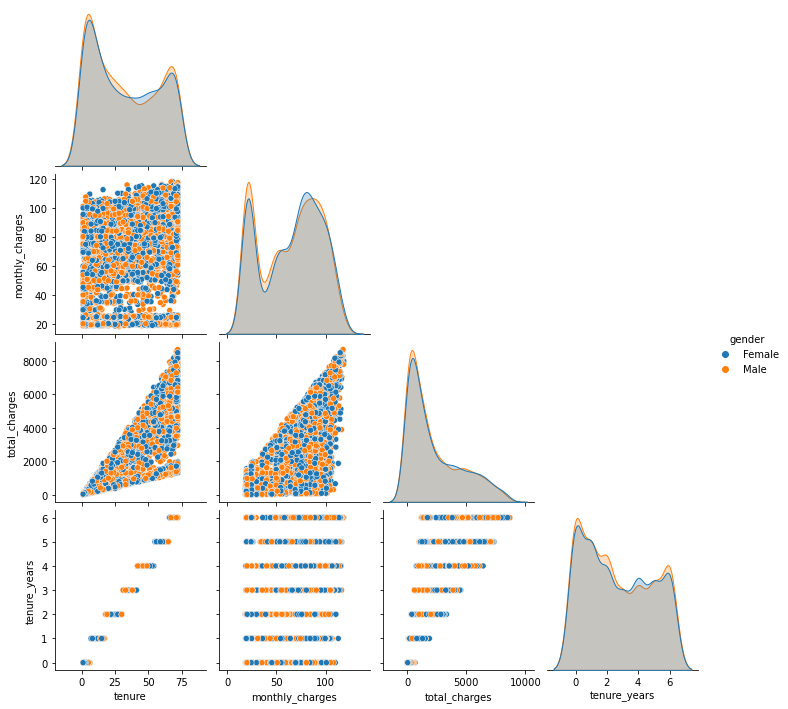

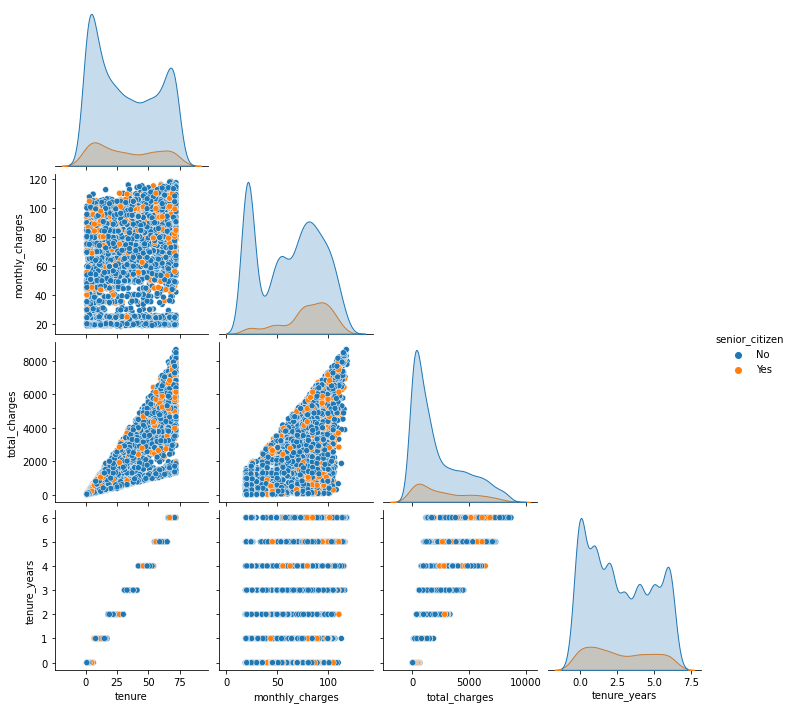

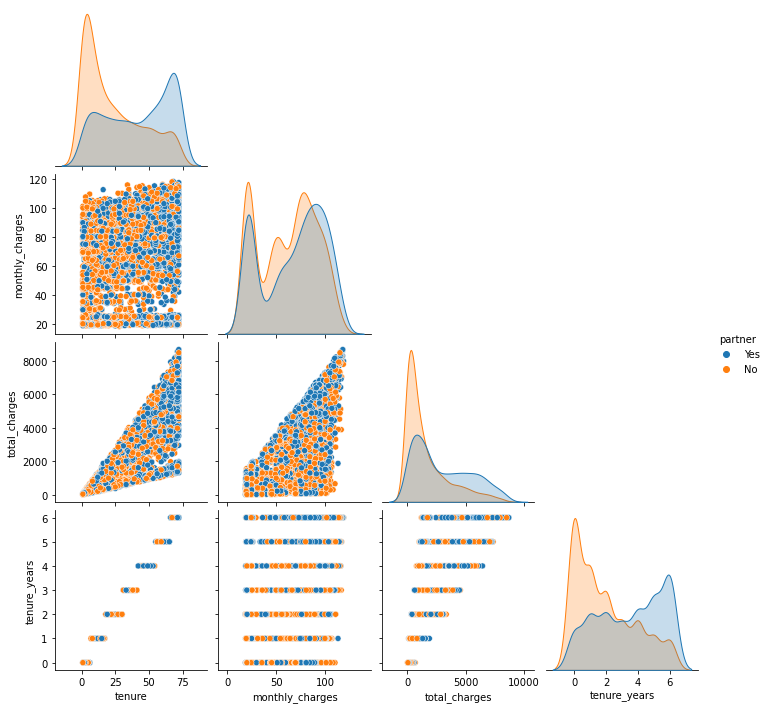

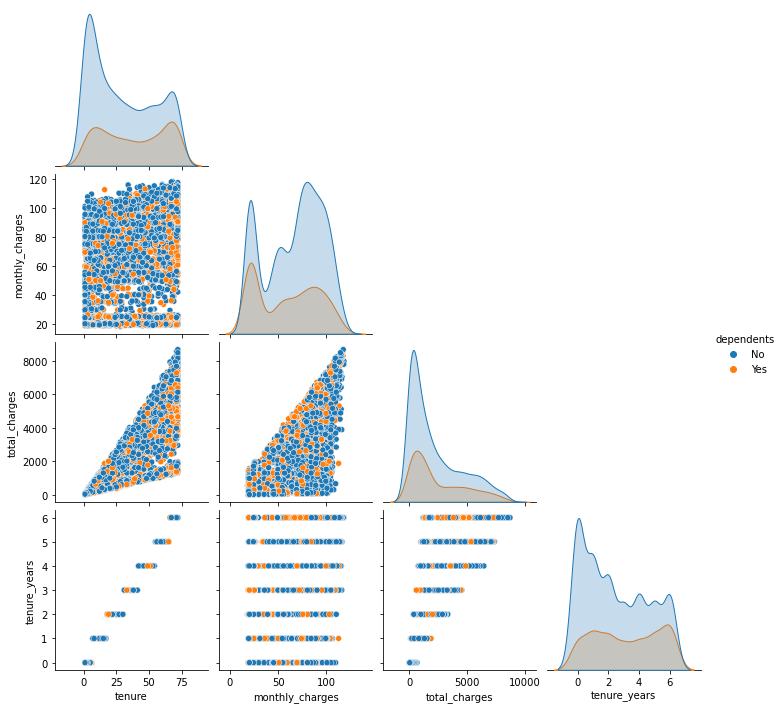

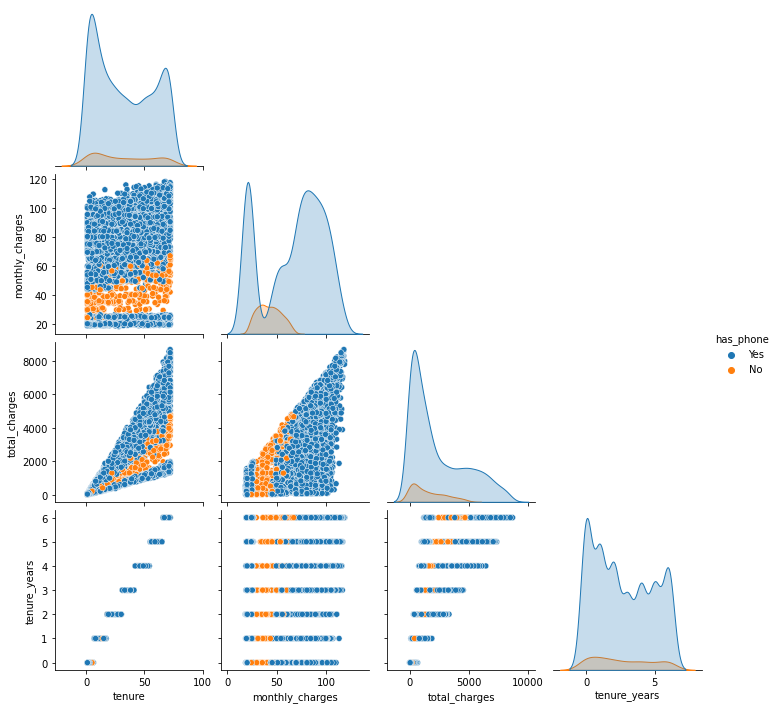

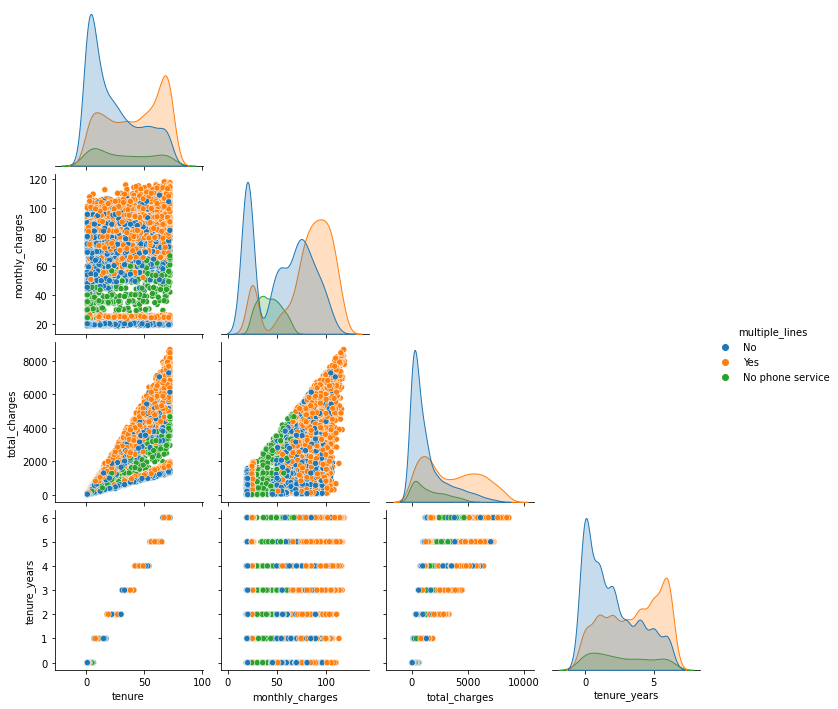

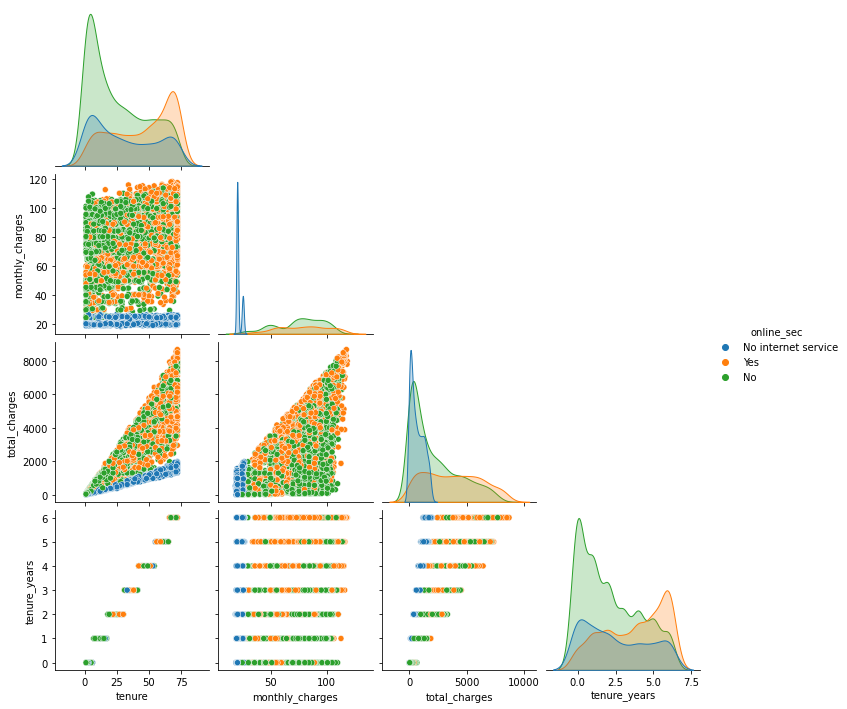

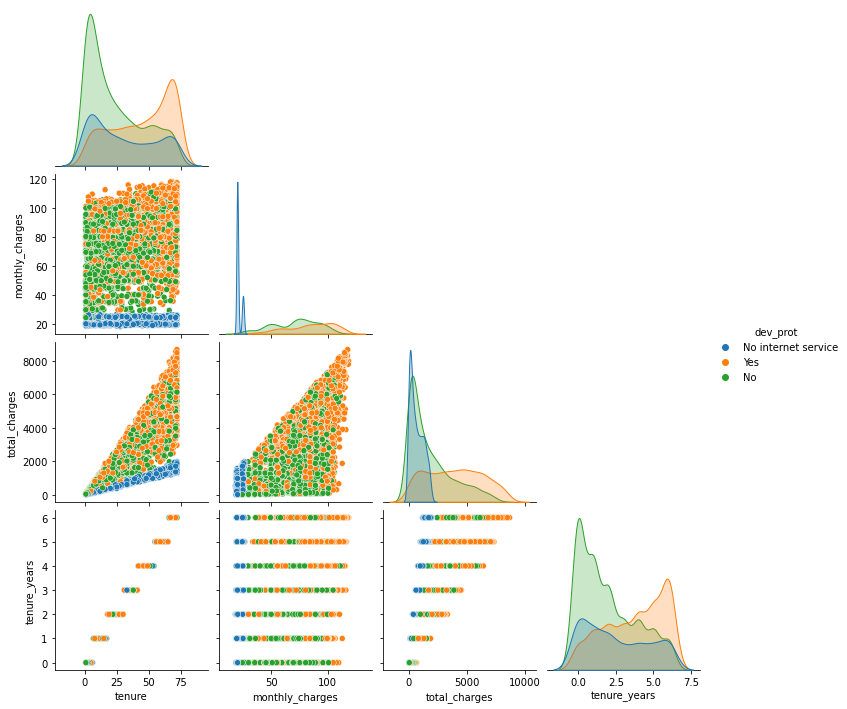

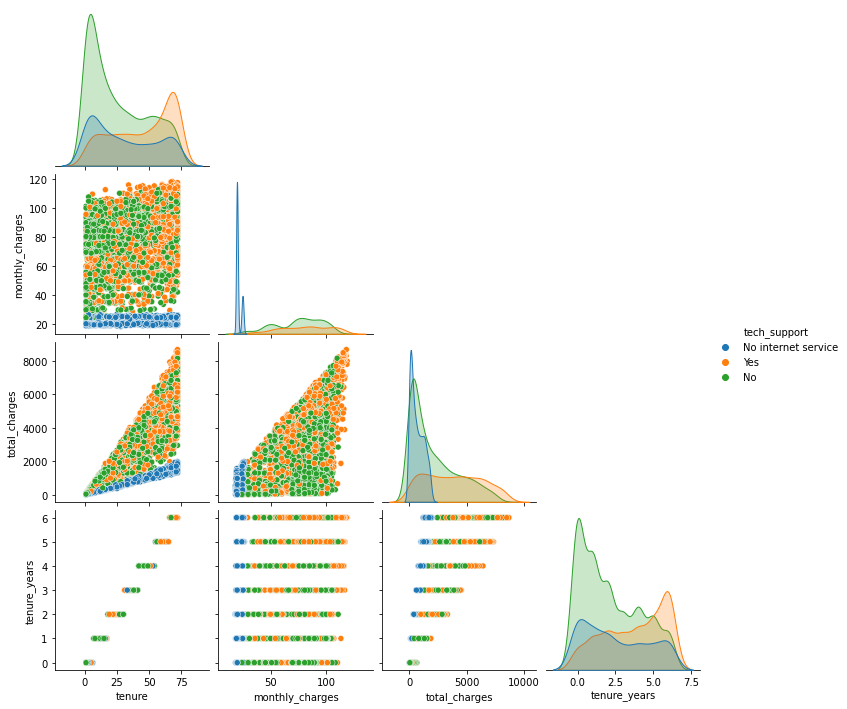

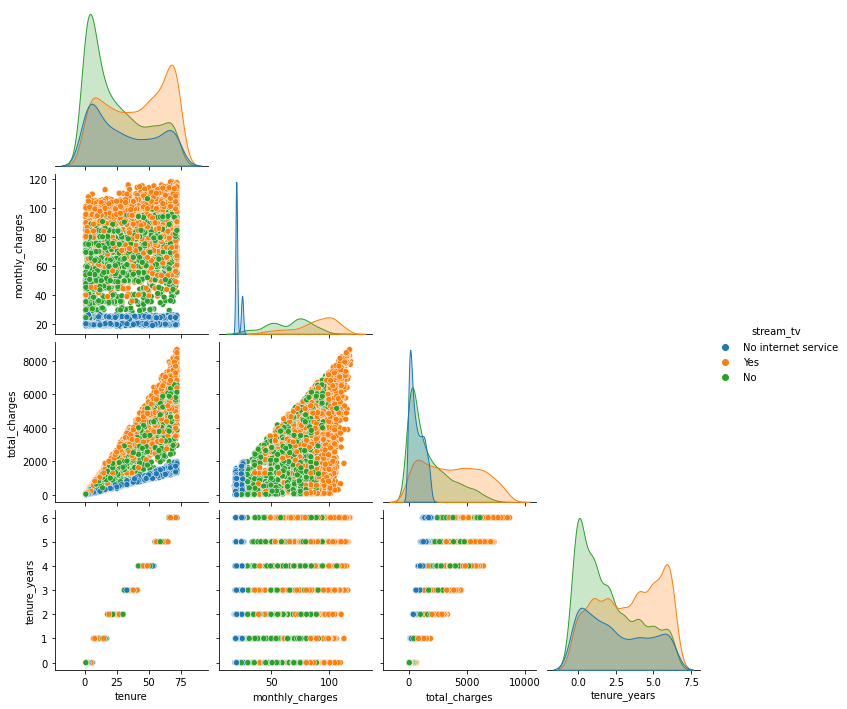

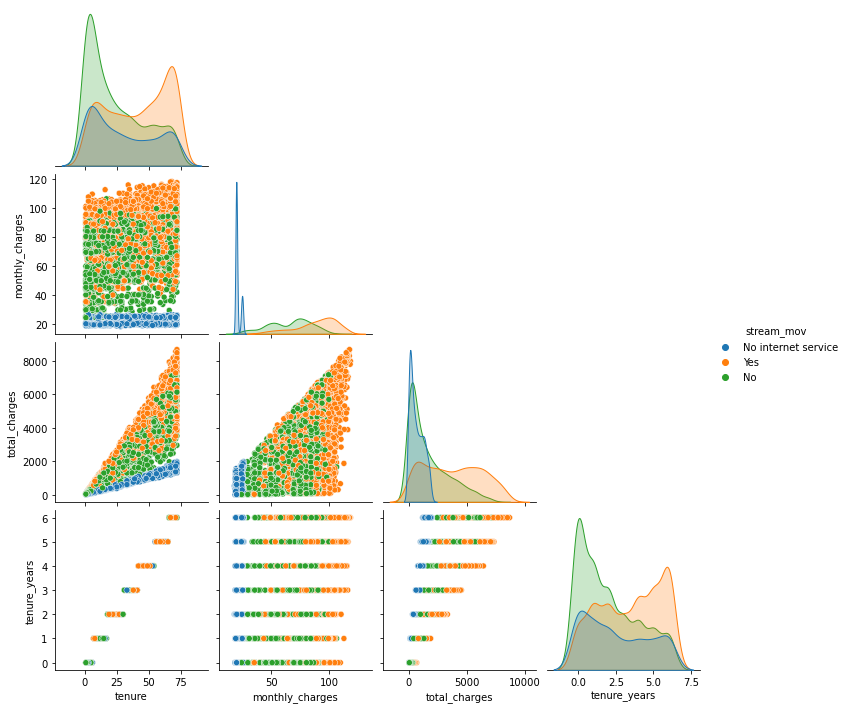

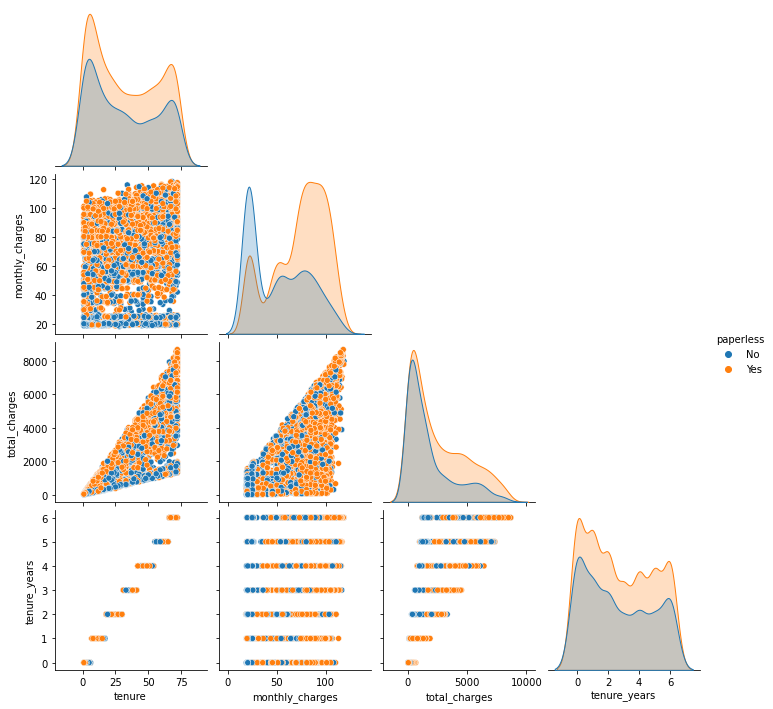

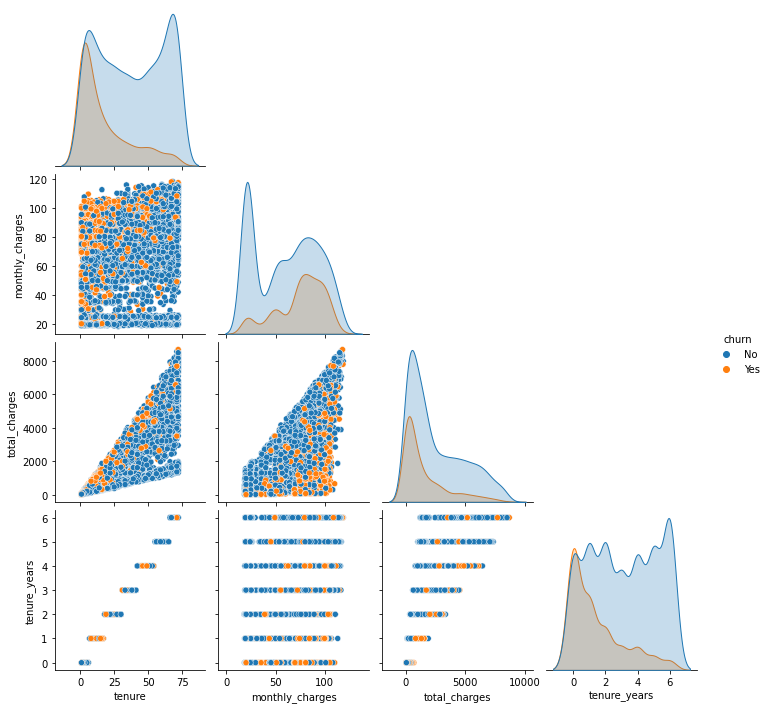

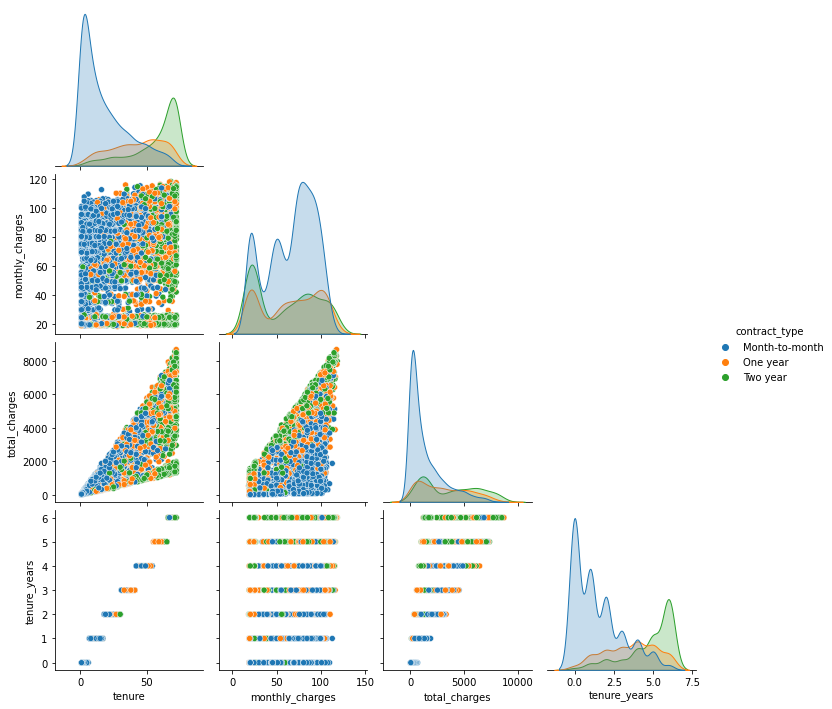

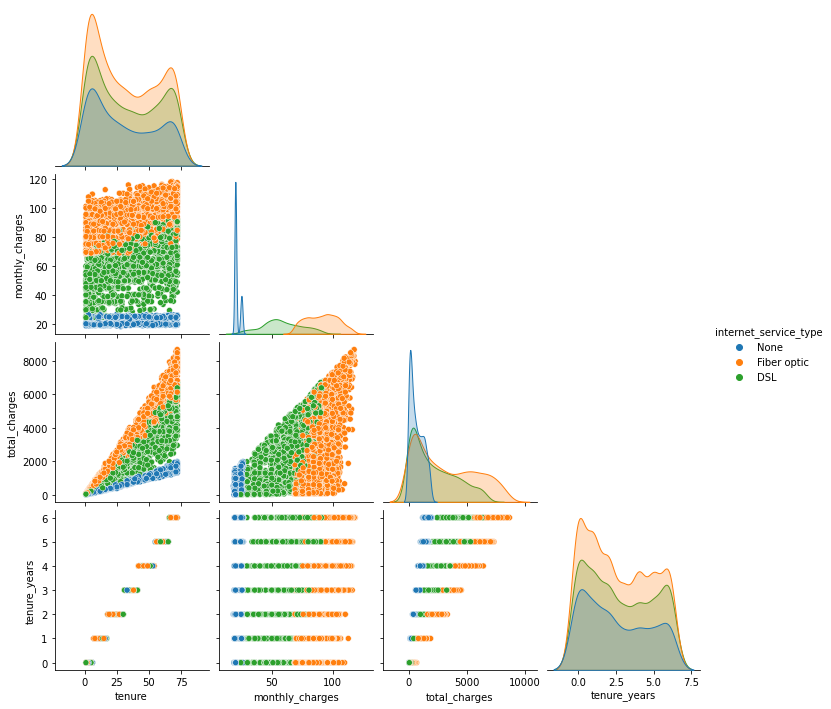

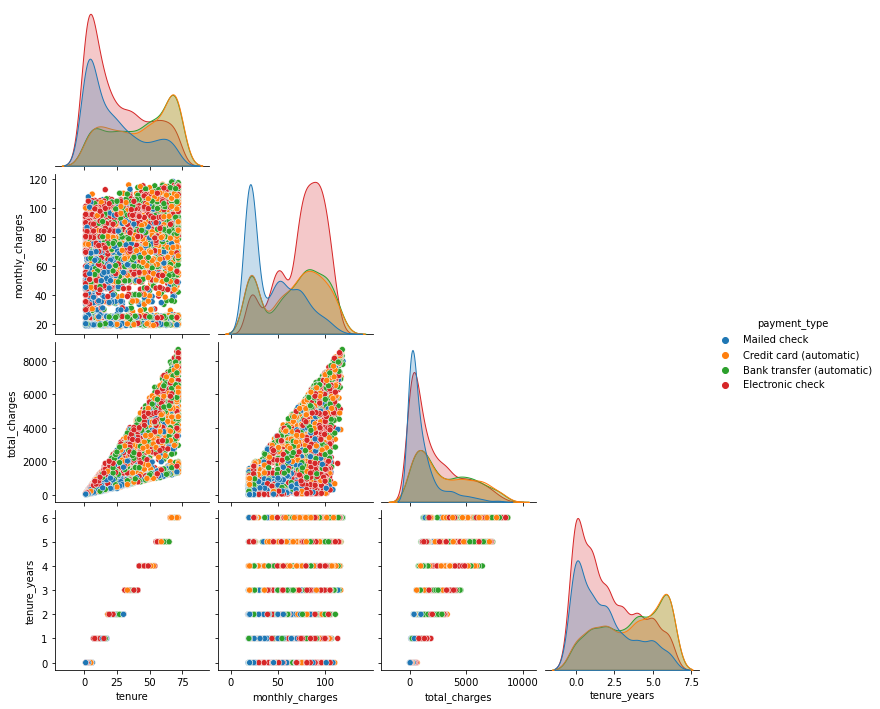

In [5]:
et.plot_variable_pairs(train)

-------------------------------------------------
monthly_charges
-------------------------------------------------
vs. gender
---------------


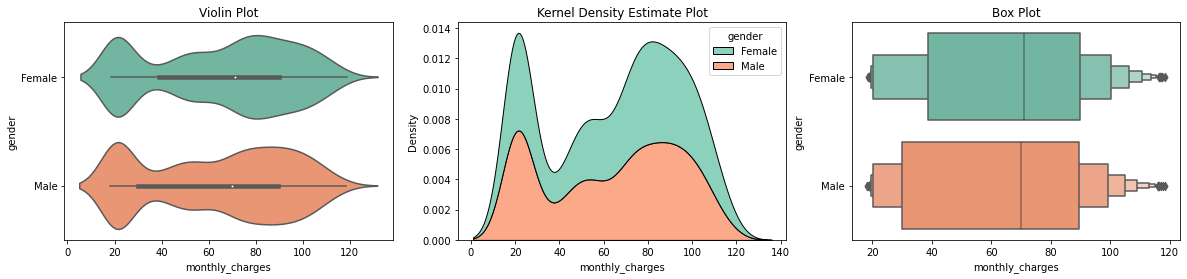

vs. senior_citizen
---------------


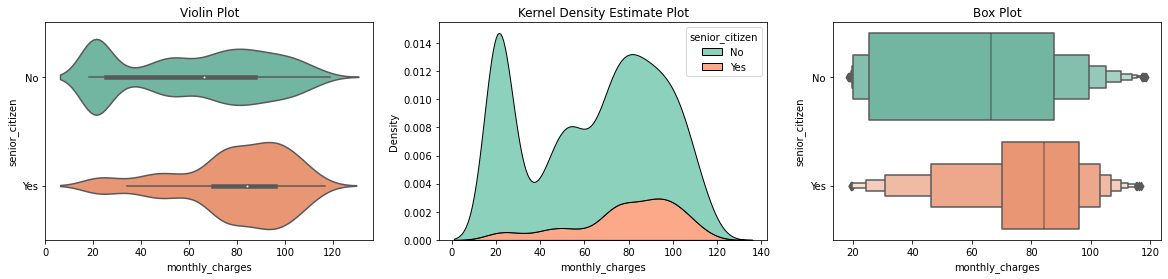

vs. partner
---------------


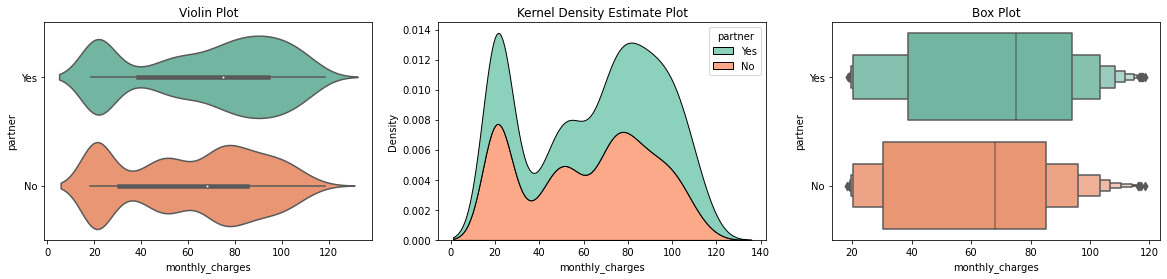

vs. dependents
---------------


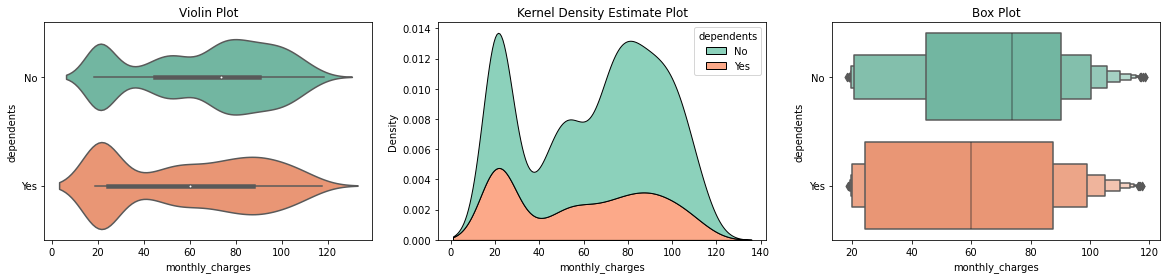

vs. has_phone
---------------


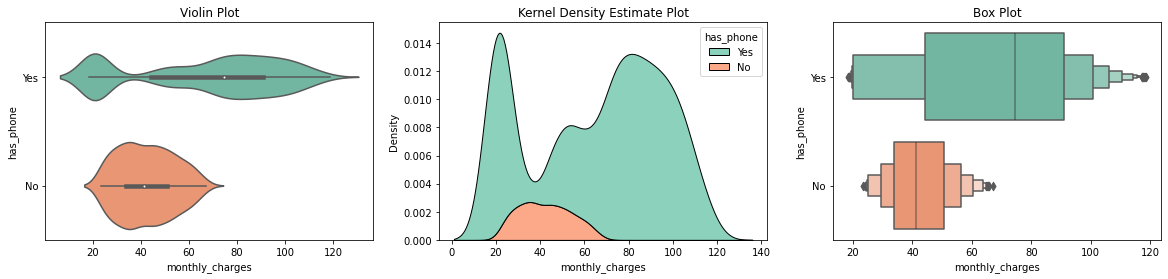

vs. multiple_lines
---------------


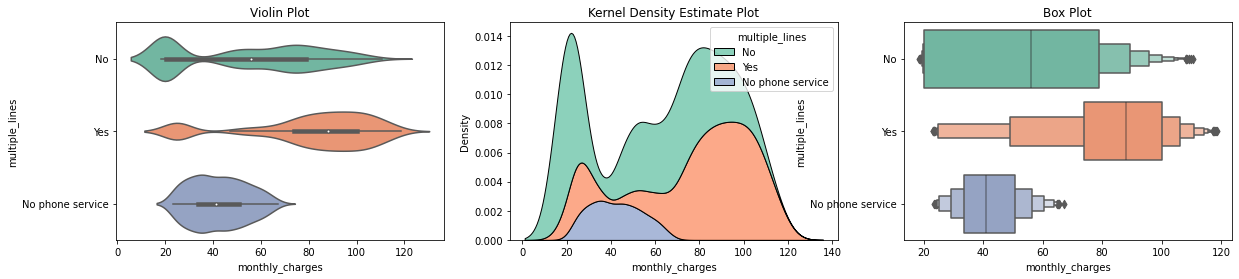

vs. online_sec
---------------


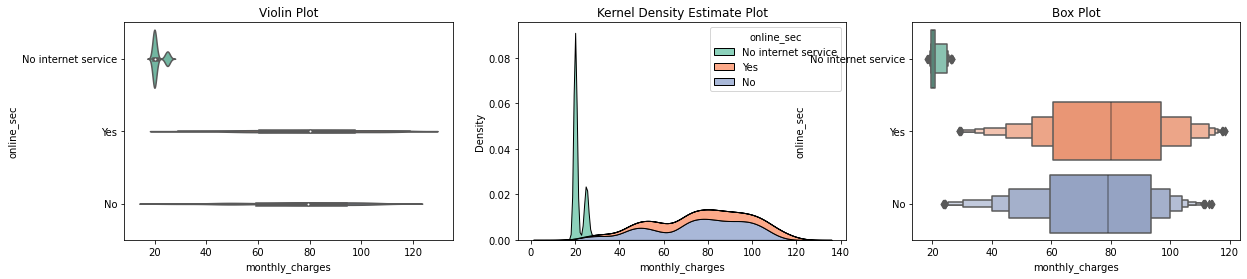

vs. dev_prot
---------------


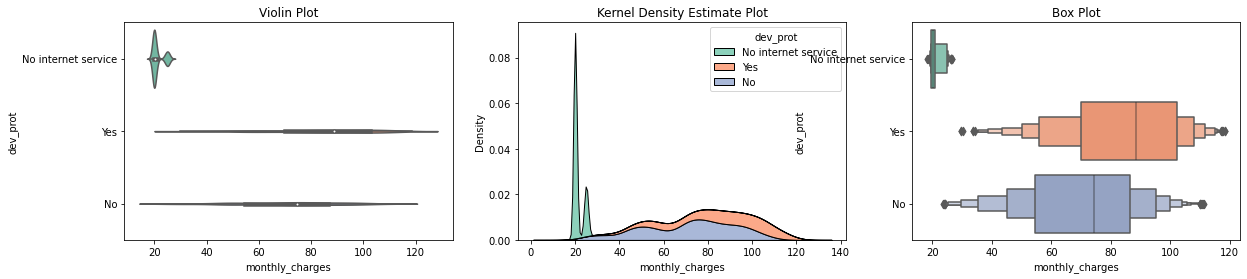

vs. tech_support
---------------


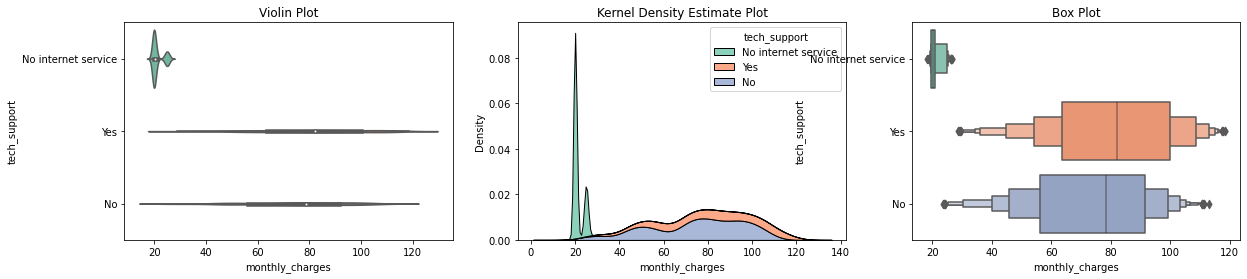

vs. stream_tv
---------------


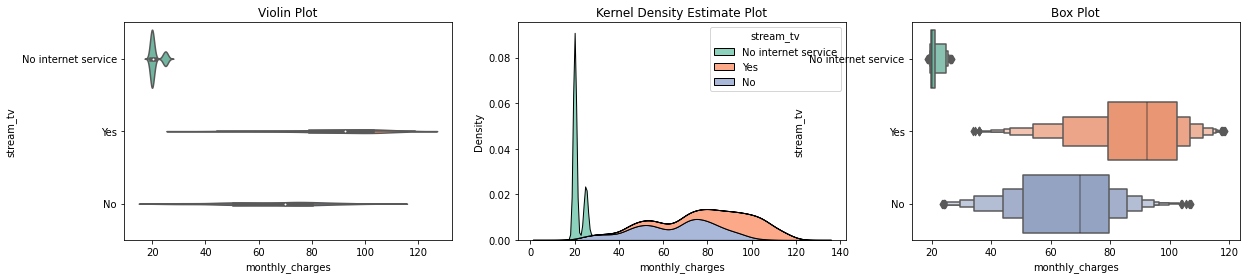

vs. stream_mov
---------------


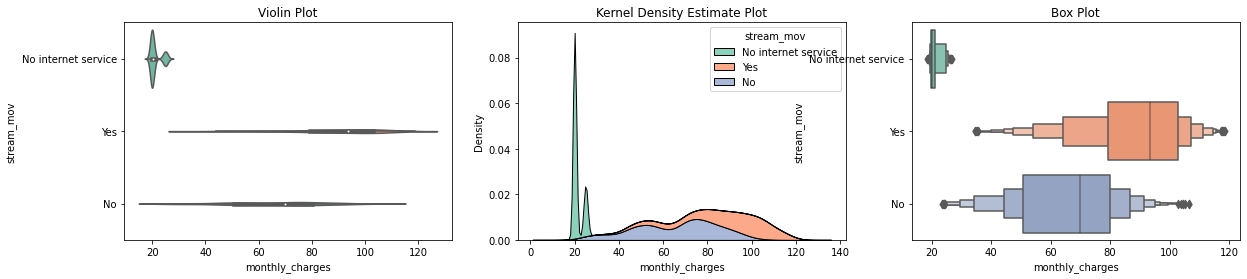

vs. paperless
---------------


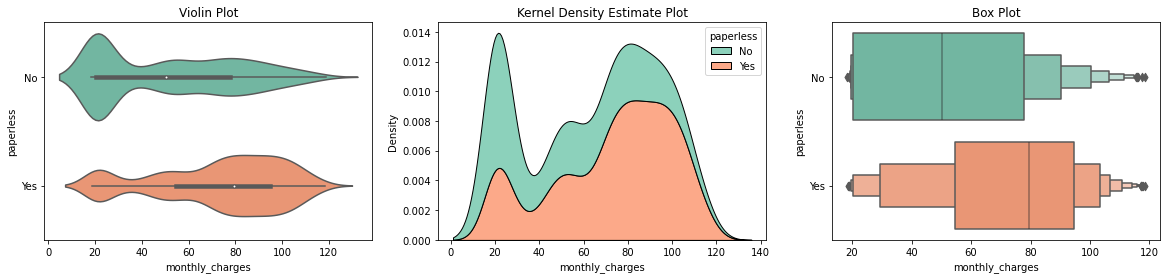

vs. churn
---------------


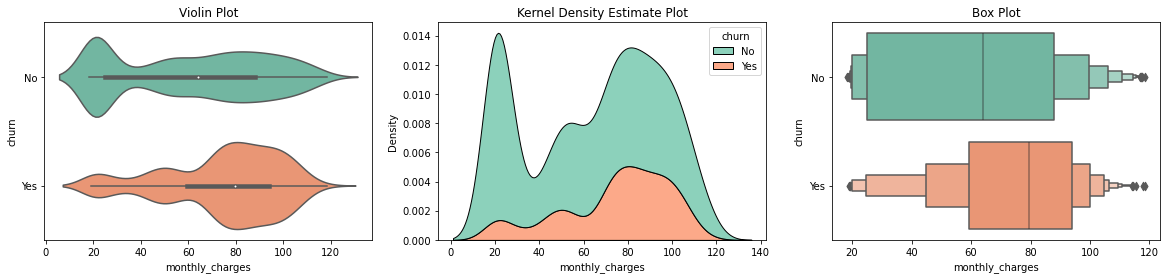

vs. contract_type
---------------


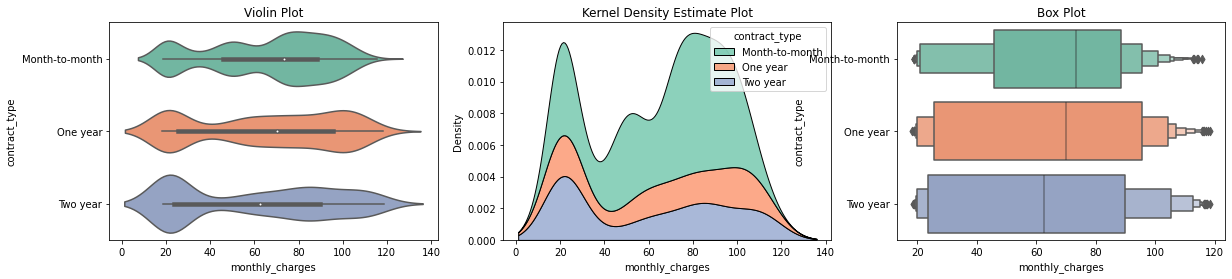

vs. internet_service_type
---------------


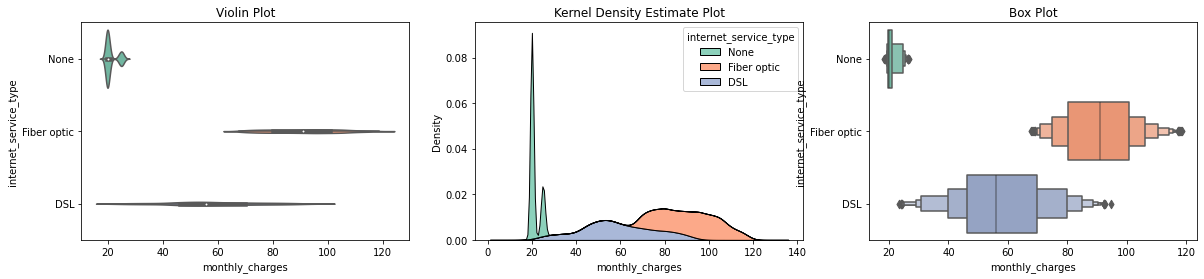

vs. payment_type
---------------


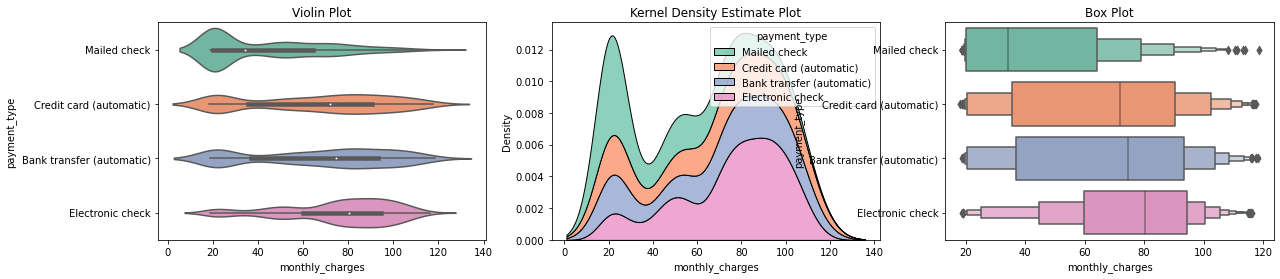

-------------------------------------------------
total_charges
-------------------------------------------------
vs. gender
---------------


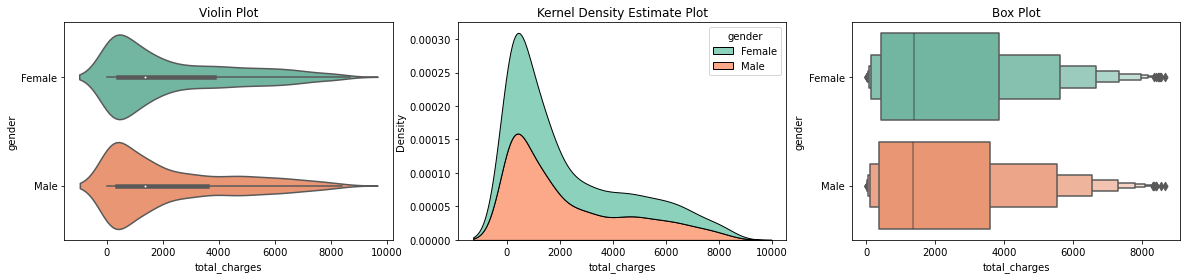

vs. senior_citizen
---------------


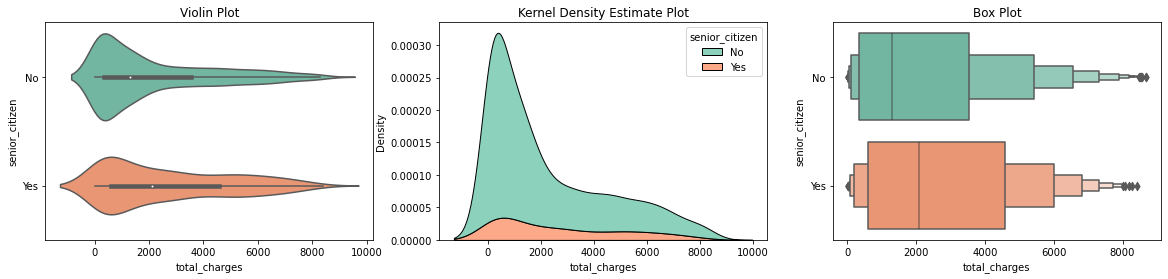

vs. partner
---------------


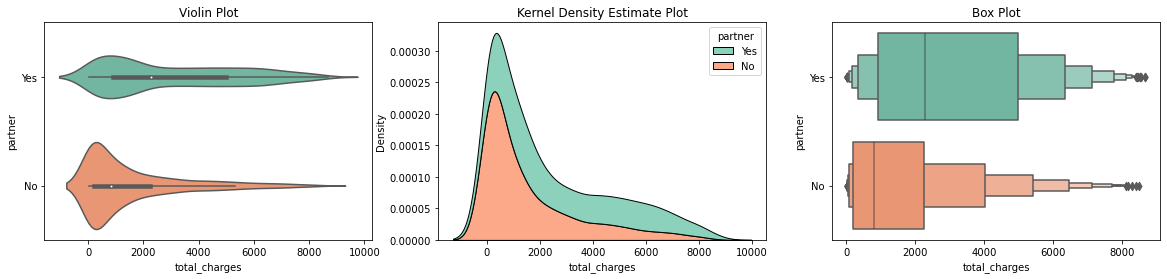

vs. dependents
---------------


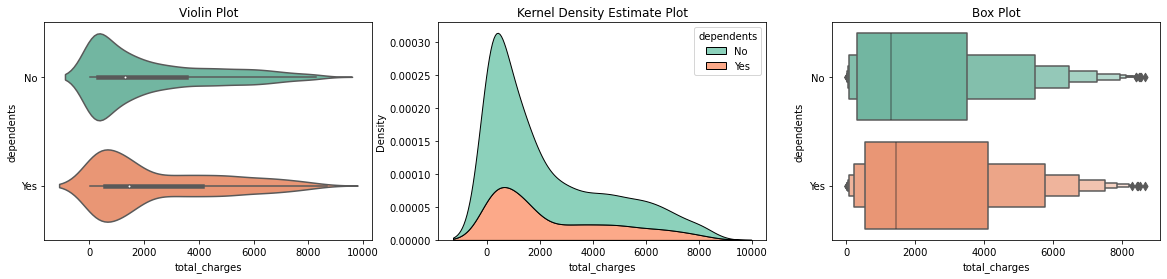

vs. has_phone
---------------


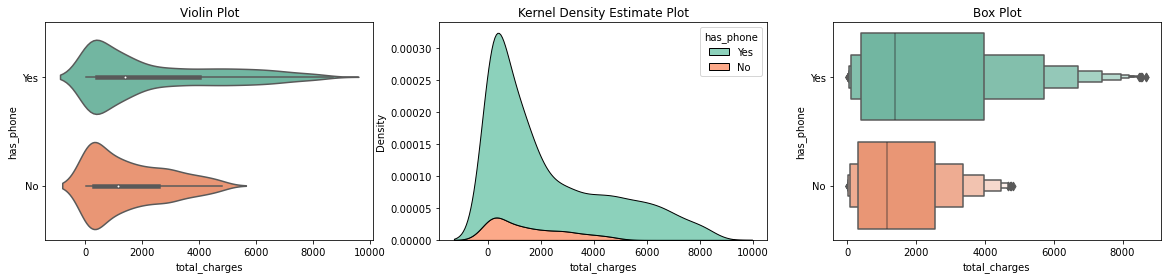

vs. multiple_lines
---------------


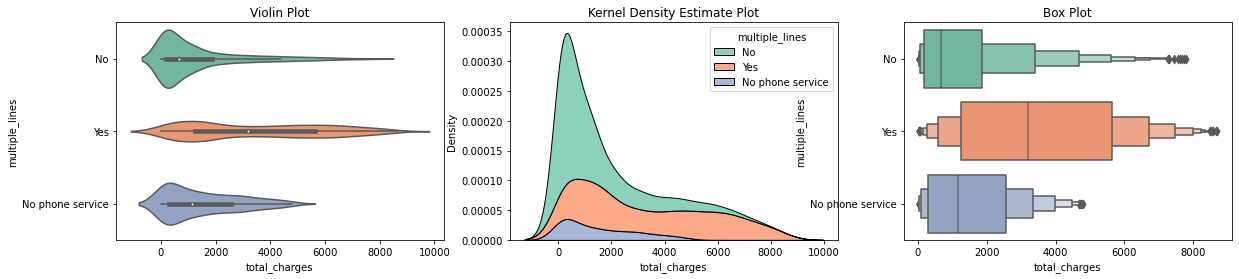

vs. online_sec
---------------


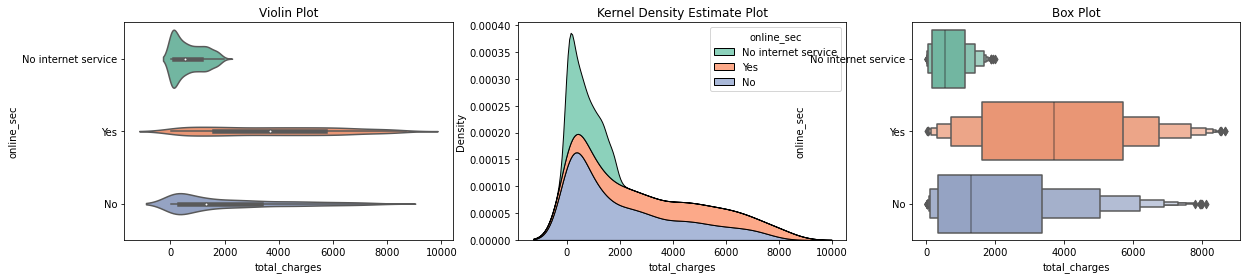

vs. dev_prot
---------------


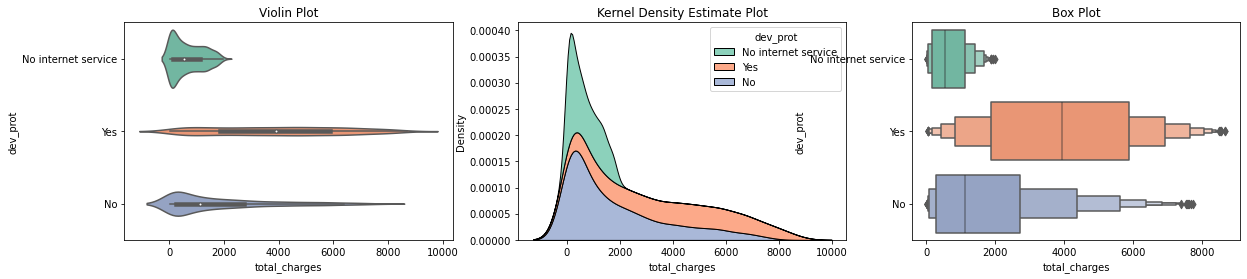

vs. tech_support
---------------


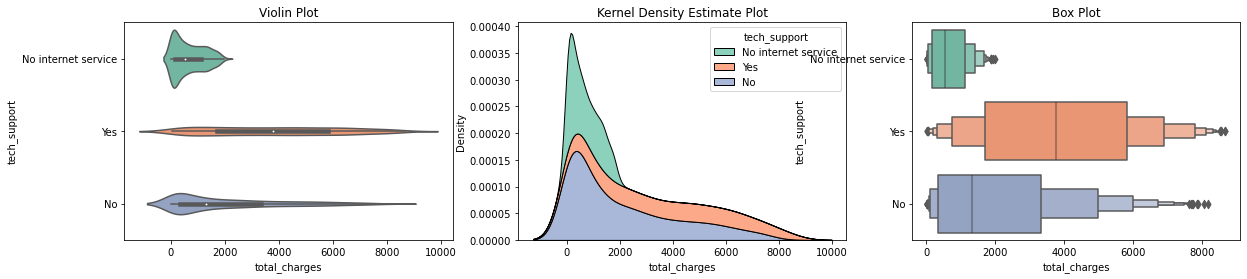

vs. stream_tv
---------------


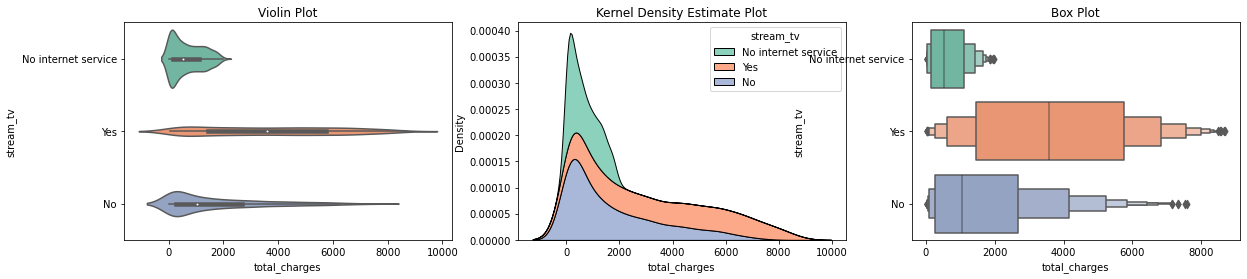

vs. stream_mov
---------------


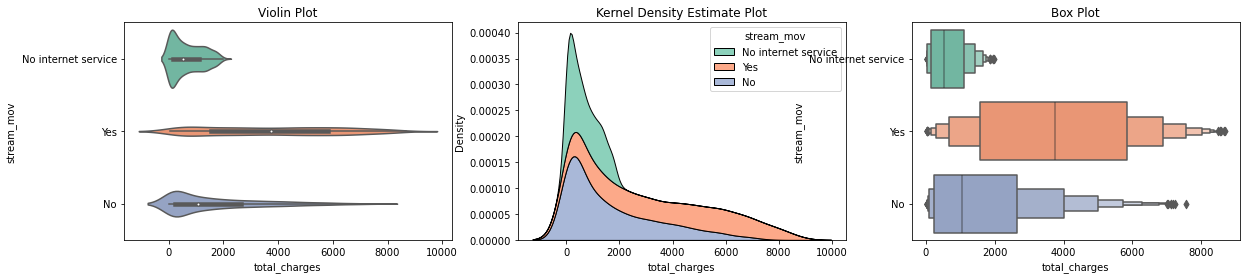

vs. paperless
---------------


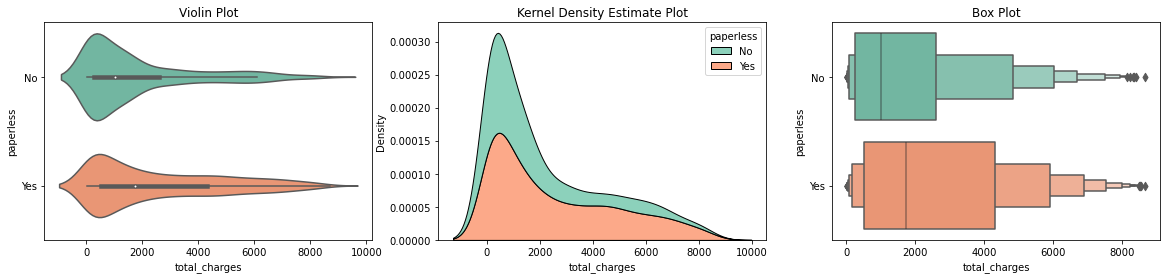

vs. churn
---------------


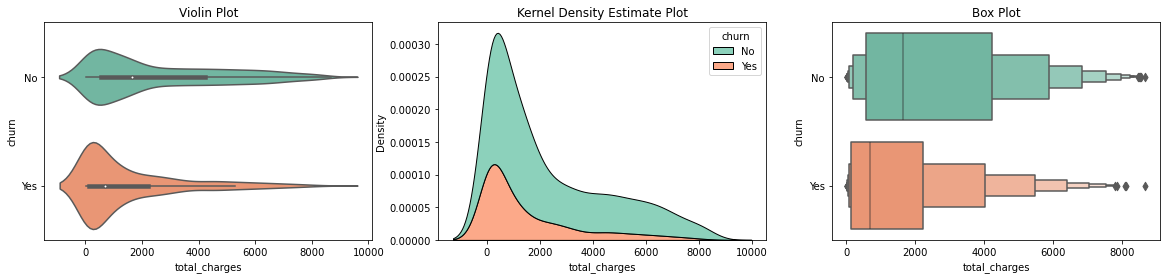

vs. contract_type
---------------


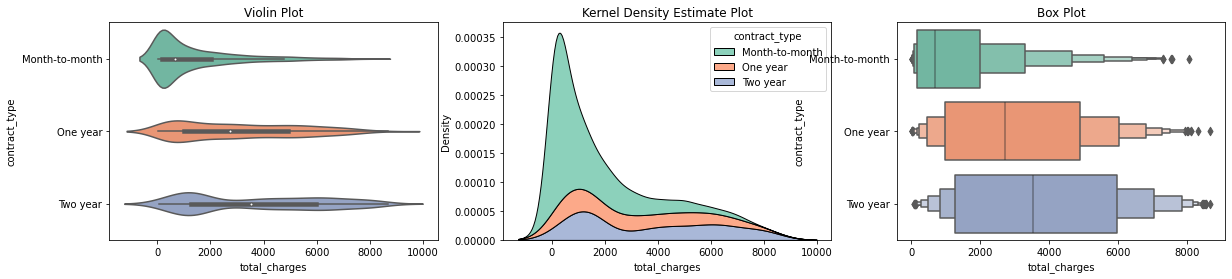

vs. internet_service_type
---------------


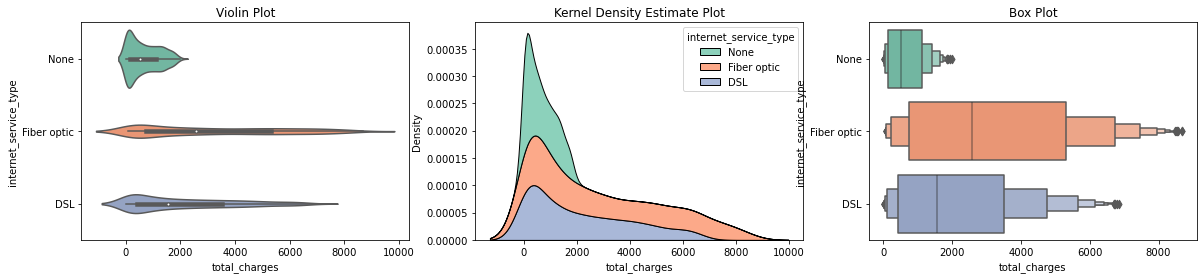

vs. payment_type
---------------


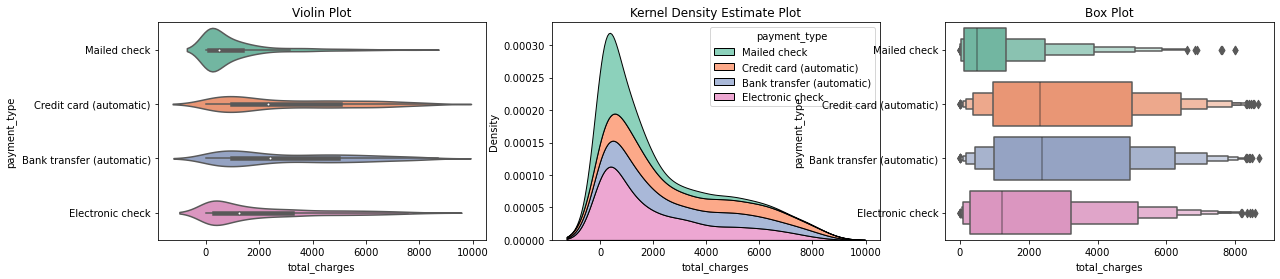

-------------------------------------------------
tenure
-------------------------------------------------
vs. gender
---------------


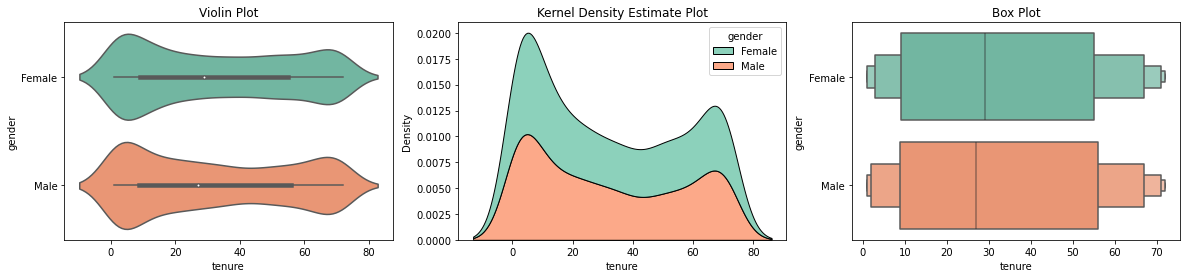

vs. senior_citizen
---------------


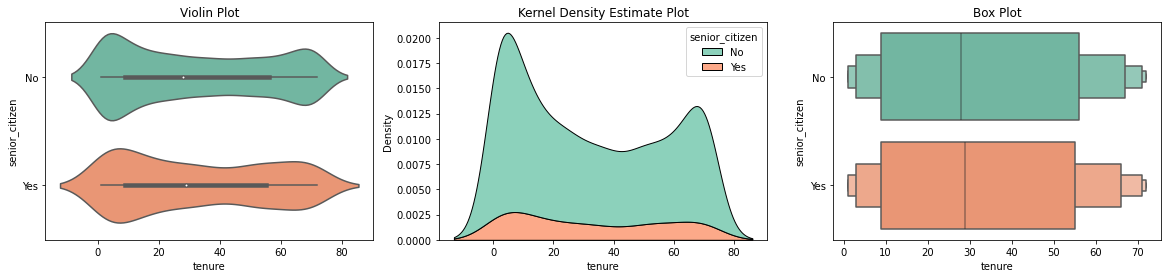

vs. partner
---------------


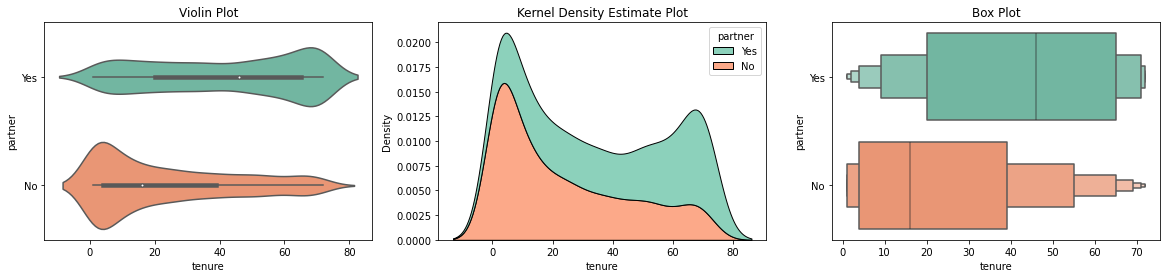

vs. dependents
---------------


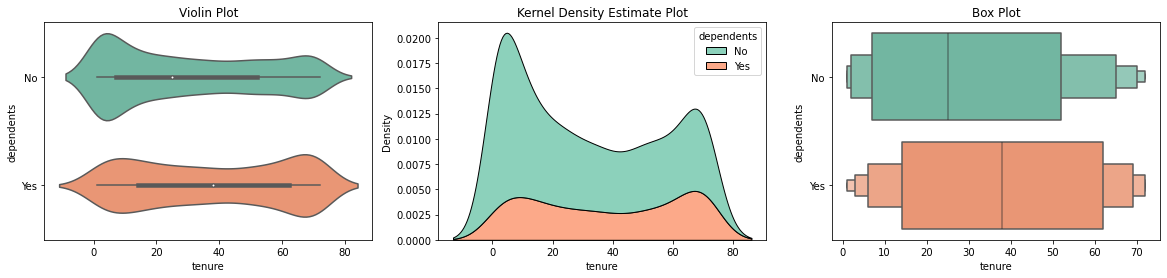

vs. has_phone
---------------


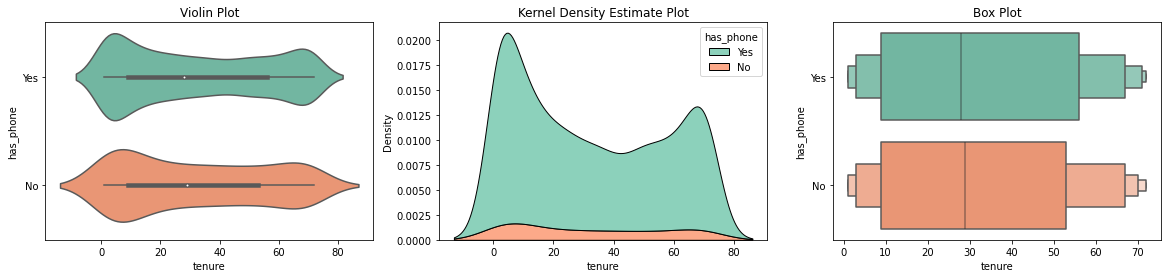

vs. multiple_lines
---------------


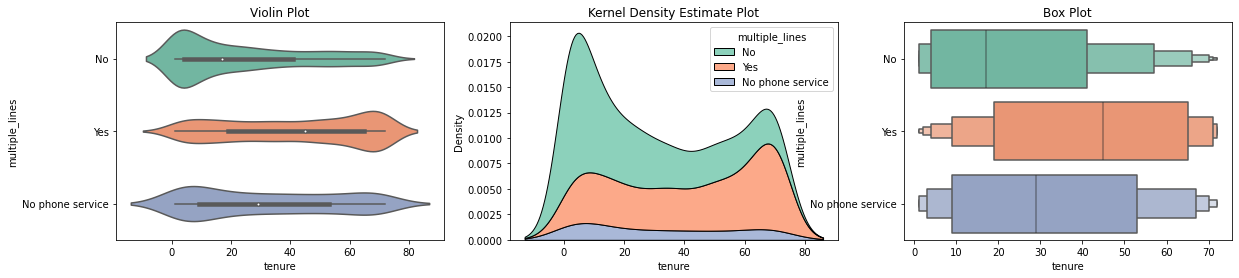

vs. online_sec
---------------


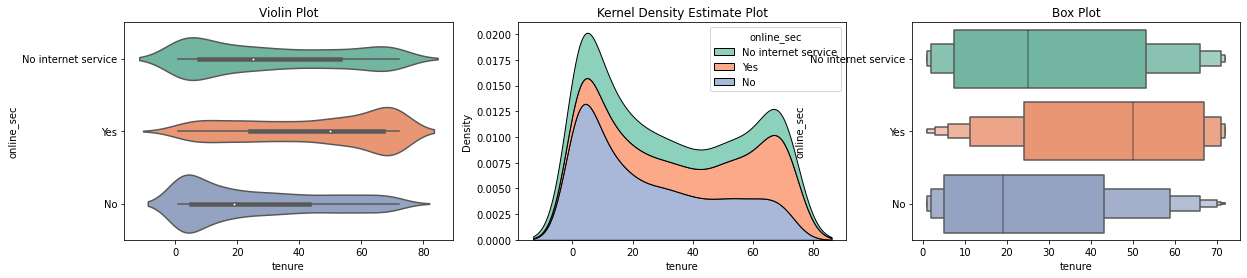

vs. dev_prot
---------------


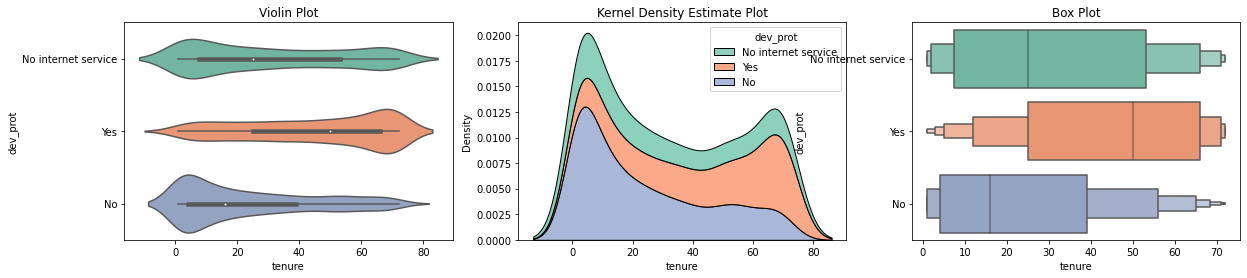

vs. tech_support
---------------


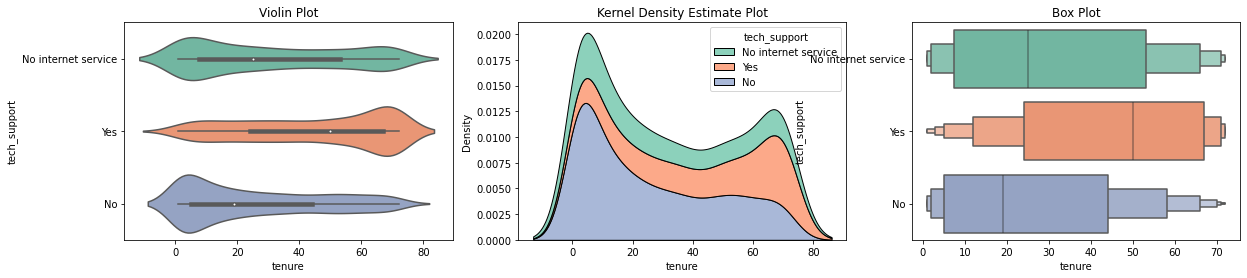

vs. stream_tv
---------------


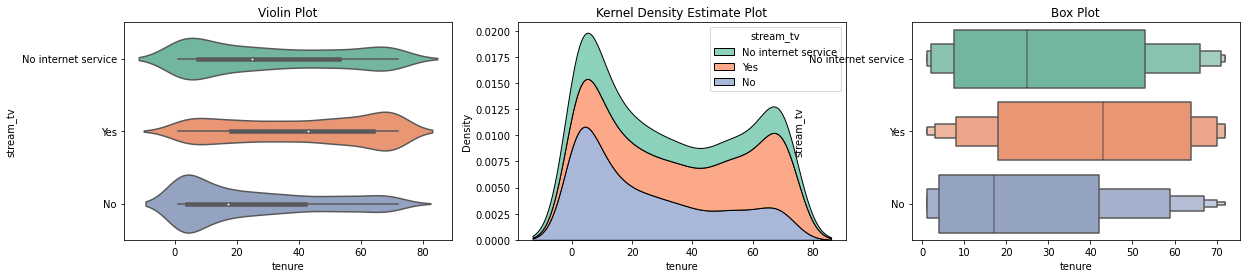

vs. stream_mov
---------------


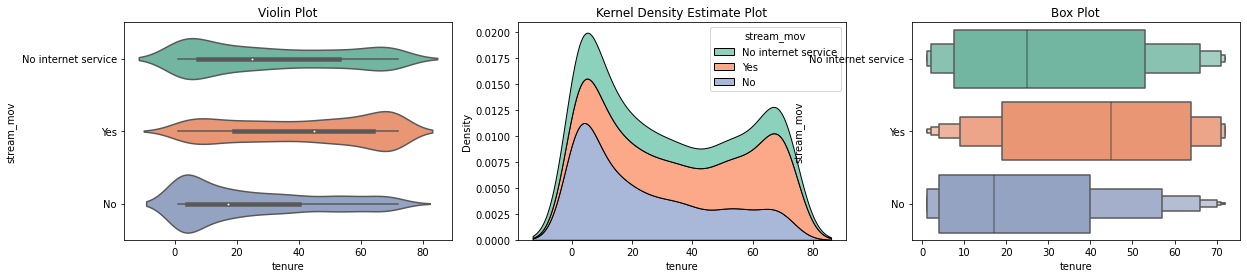

vs. paperless
---------------


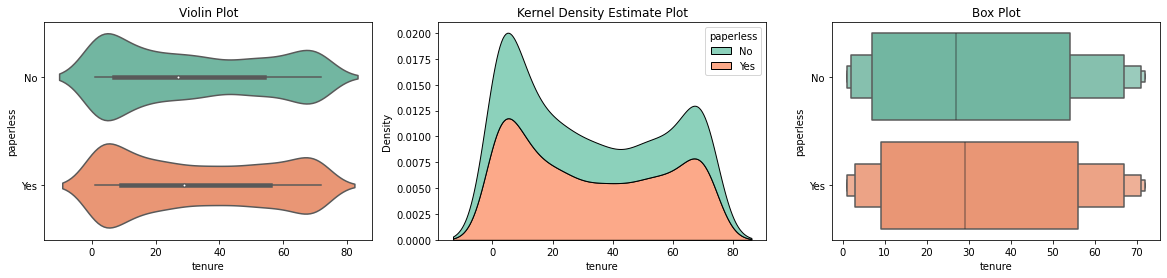

vs. churn
---------------


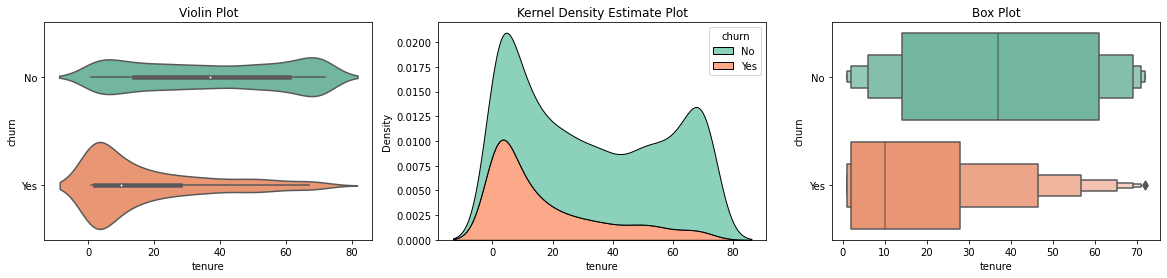

vs. contract_type
---------------


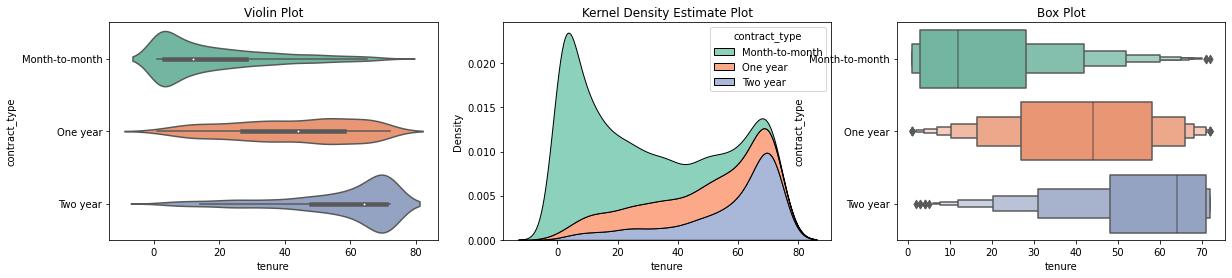

vs. internet_service_type
---------------


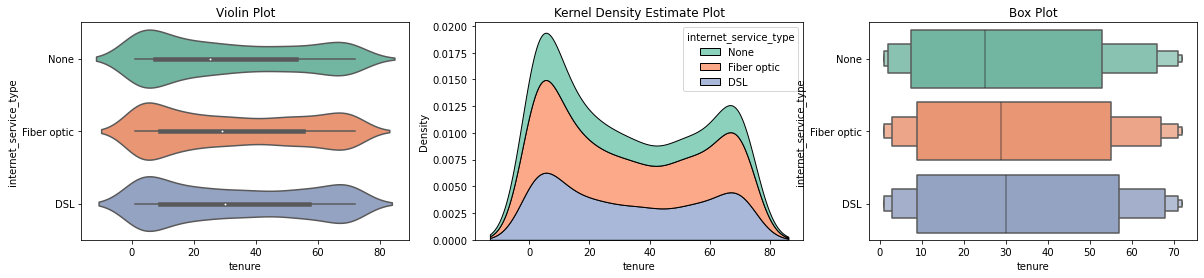

vs. payment_type
---------------


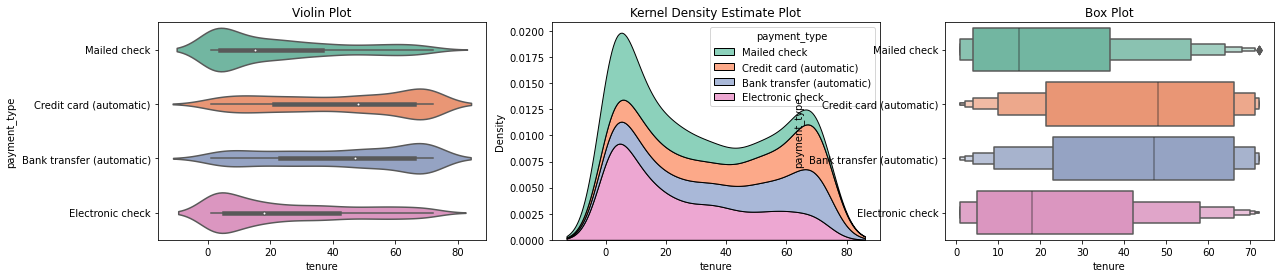

-------------------------------------------------
tenure_years
-------------------------------------------------
vs. gender
---------------


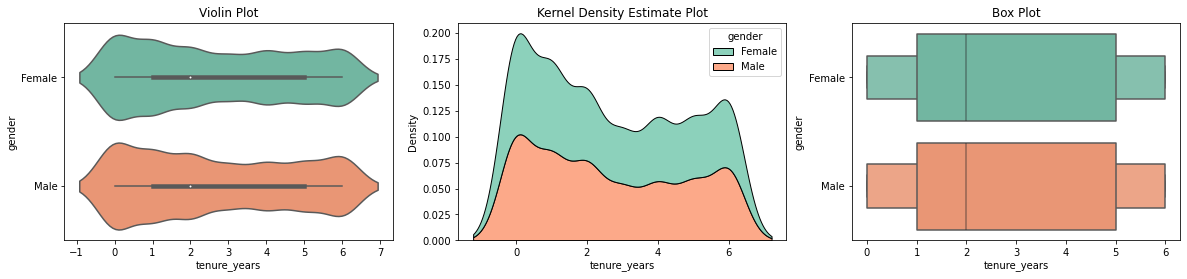

vs. senior_citizen
---------------


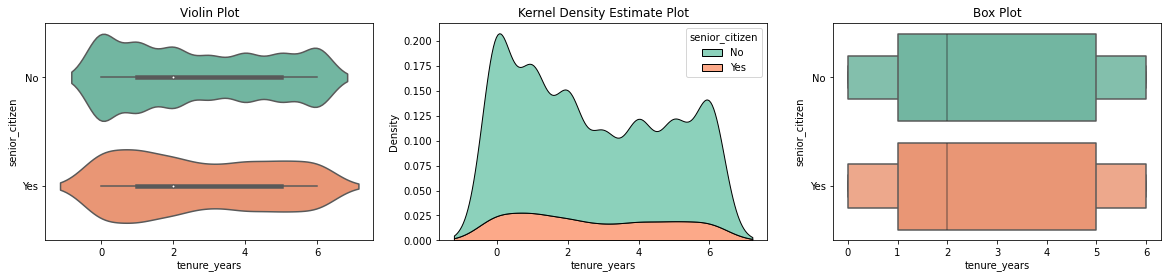

vs. partner
---------------


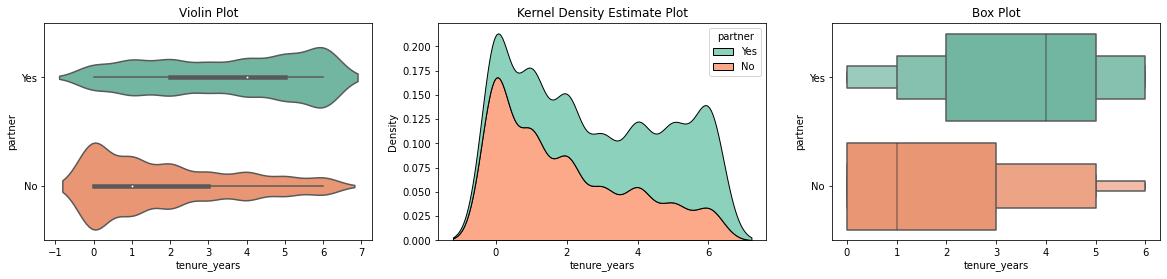

vs. dependents
---------------


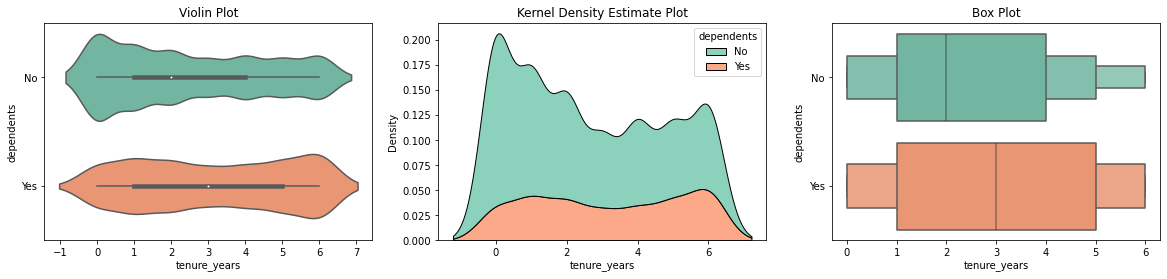

vs. has_phone
---------------


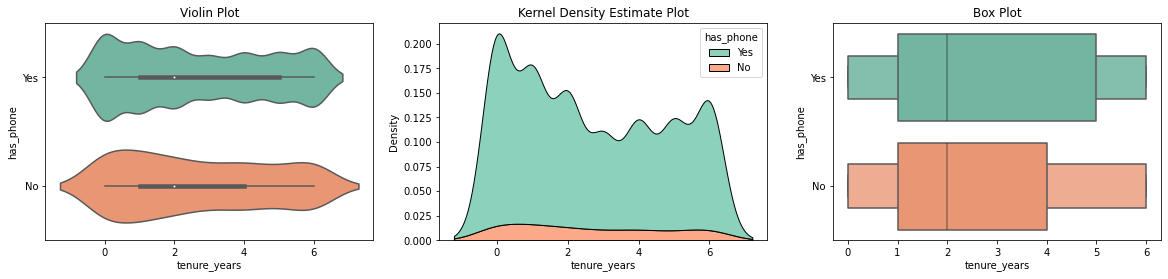

vs. multiple_lines
---------------


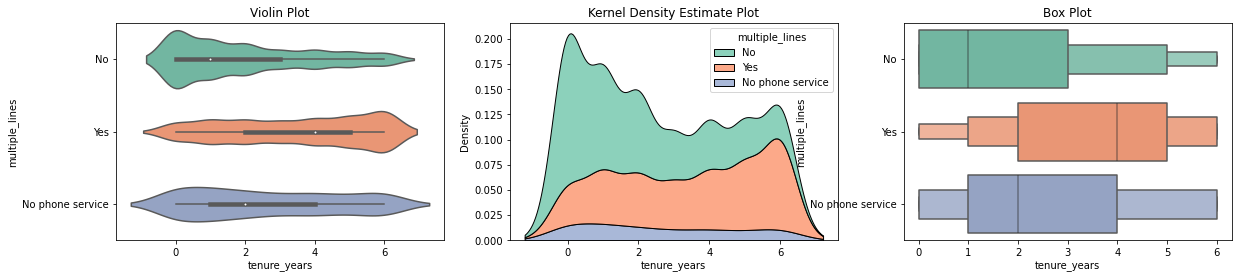

vs. online_sec
---------------


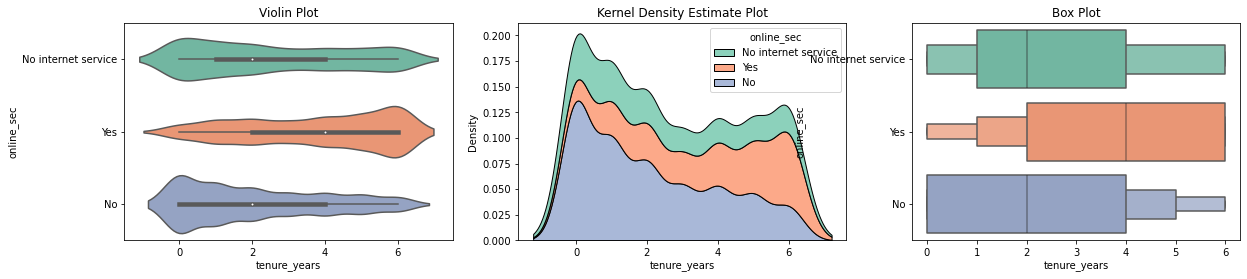

vs. dev_prot
---------------


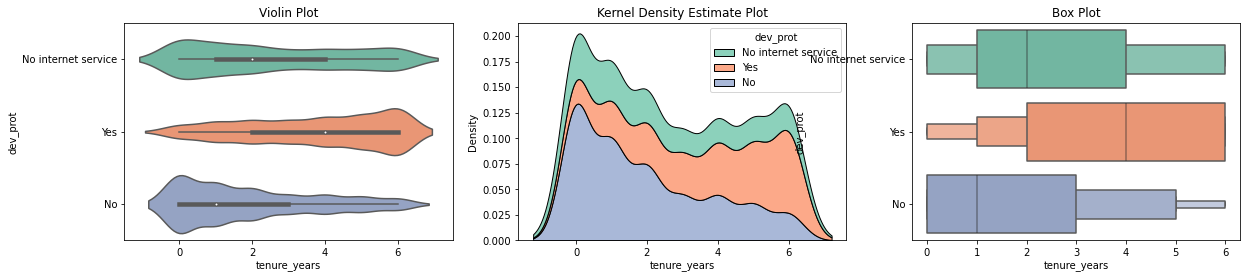

vs. tech_support
---------------


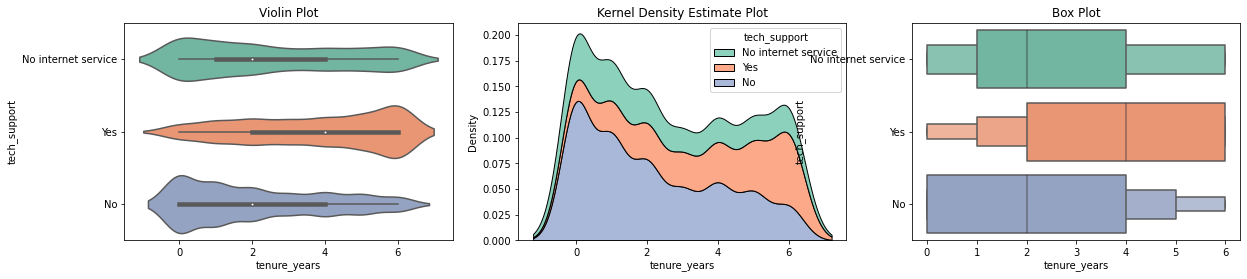

vs. stream_tv
---------------


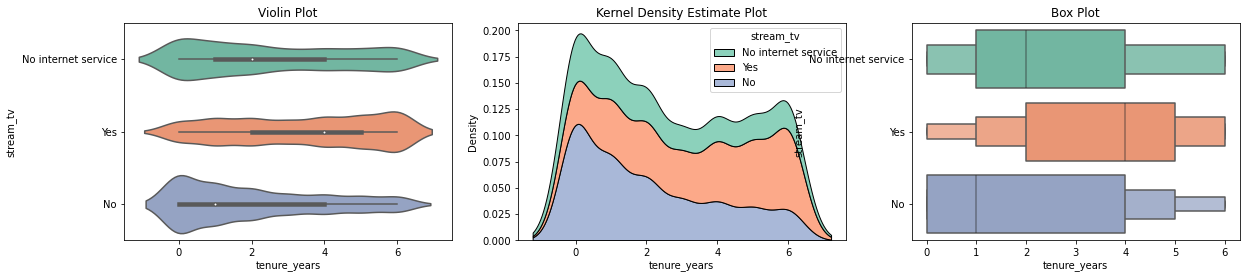

vs. stream_mov
---------------


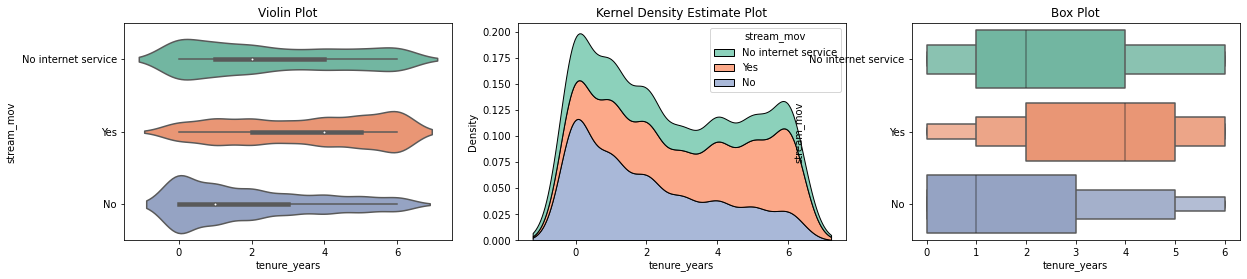

vs. paperless
---------------


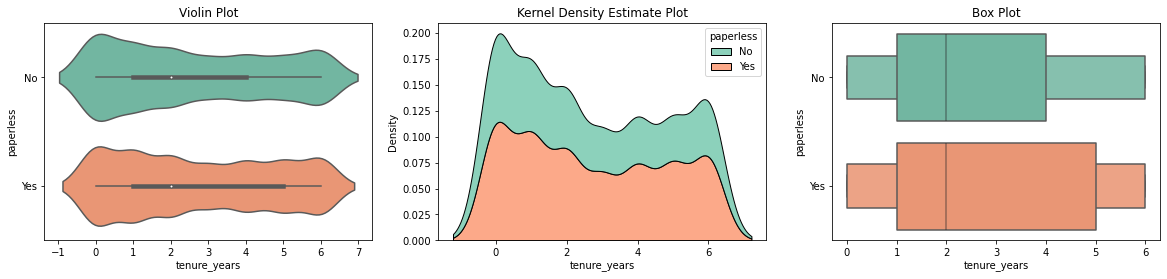

vs. churn
---------------


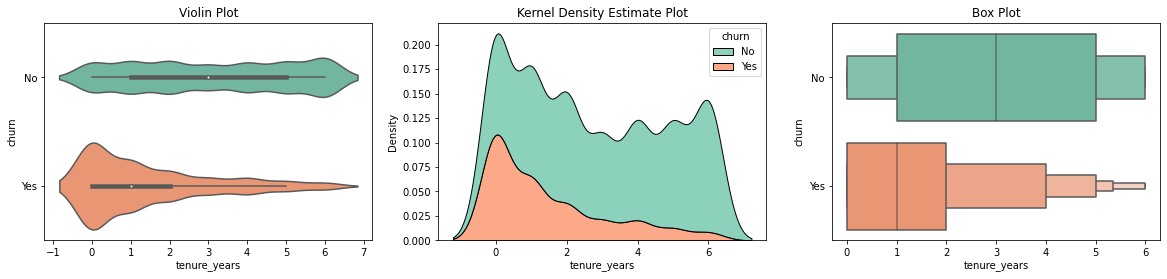

vs. contract_type
---------------


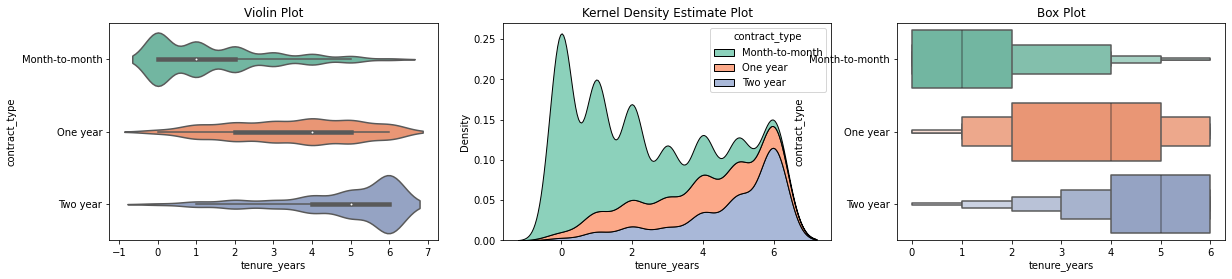

vs. internet_service_type
---------------


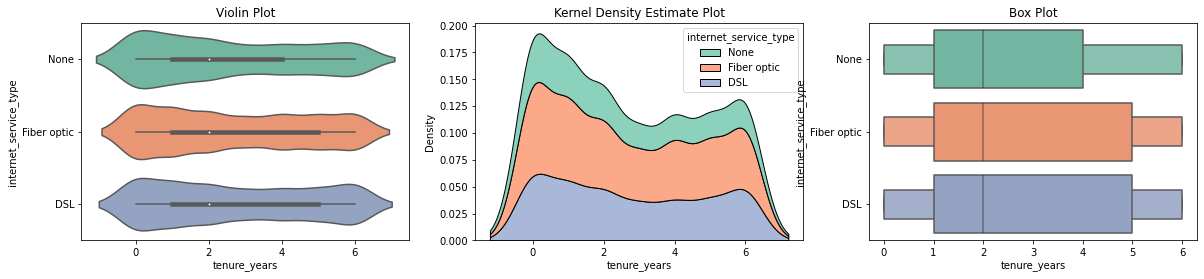

vs. payment_type
---------------


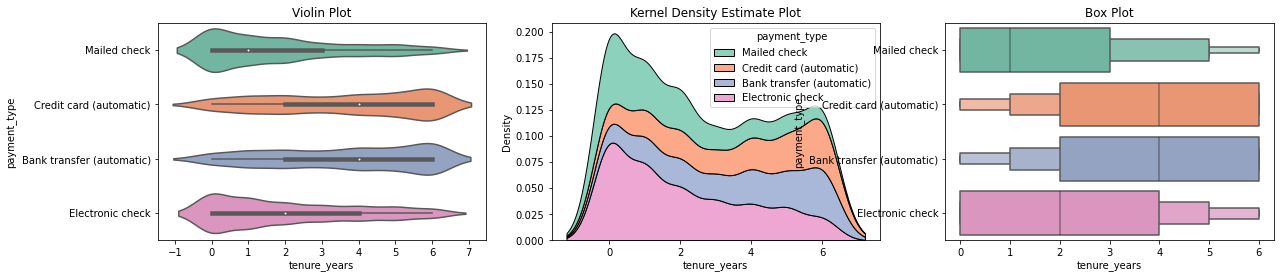

In [6]:
et.plot_categorical_and_continuous_vars(train, cats, quants)

### 6. Explore your dataset with any other visualizations you think will be helpful.

In [10]:
s_train, s_val, s_test = wt.wrangle_telco()
train

gender senior_citizen partner dependents  tenure has_phone  \
6184  Female             No     Yes         No       2       Yes   
2657    Male             No      No         No      68       Yes   
5444    Male             No     Yes        Yes      55       Yes   
3011    Male             No     Yes        Yes      71       Yes   
6457    Male             No      No        Yes      55       Yes   
...      ...            ...     ...        ...     ...       ...   
453     Male             No      No         No      38       Yes   
2023  Female             No      No         No       8       Yes   
4094  Female             No      No         No       1       Yes   
1476    Male            Yes      No         No      67       Yes   
4768  Female             No      No         No      59       Yes   

     multiple_lines           online_sec             dev_prot  \
6184             No  No internet service  No internet service   
2657            Yes                  Yes                  Yes   
5444             No                   No                  Yes   
3011            Yes                  Yes                  Yes   
6457             No  No internet service  No internet service   
...             ...                  ...                  ...   
453             Yes                  Yes                   No   
2023            Yes                   No                  Yes   
4094             No                   No                   No   
1476            Yes                   No                  Yes   
4768            Yes                  Yes                  Yes   

             tech_support            stream_tv           stream_mov paperless  \
6184  No internet service  No internet service  No internet service        No   
2657                  Yes                  Yes                  Yes       Yes   
5444                  Yes                   No                   No       Yes   
3011                  Yes                  Yes                  Yes       Yes   
6457  No internet service  No internet service  No internet service        No   
...                   ...                  ...                  ...       ...   
453                    No                  Yes                  Yes       Yes   
2023                   No                  Yes                  Yes       Yes   
4094                   No                   No                   No       Yes   
1476                   No                  Yes                  Yes       Yes   
4768                  Yes                   No                  Yes        No   

      monthly_charges  total_charges churn   contract_type  \
6184            20.35          41.85    No  Month-to-month   
2657           117.20        8035.95    No        One year   
5444            55.25        3119.90    No        Two year   
3011           116.05        8297.50    No        Two year   
6457            19.10        1001.50    No        One year   
...               ...            ...   ...             ...   
453            104.85        3887.25    No        One year   
2023            99.65         820.50   Yes  Month-to-month   
4094            45.40          45.40    No  Month-to-month   
1476           101.40        6841.05    No  Month-to-month   
4768            79.85        4786.10    No        One year   

     internet_service_type               payment_type  tenure_years  
6184                  None               Mailed check             0  
2657           Fiber optic    Credit card (automatic)             6  
5444                   DSL    Credit card (automatic)             5  
3011           Fiber optic  Bank transfer (automatic)             6  
6457                  None  Bank transfer (automatic)             5  
...                    ...                        ...           ...  
453            Fiber optic           Electronic check             3  
2023           Fiber optic           Electronic check             1  
4094                   DSL               Mailed check       

<AxesSubplot:>

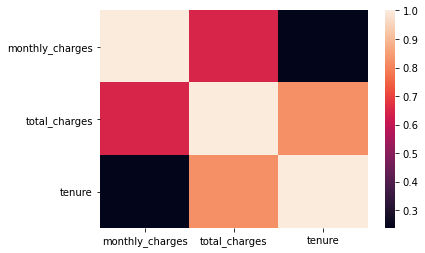

In [9]:
sns.heatmap(s_train.corr())

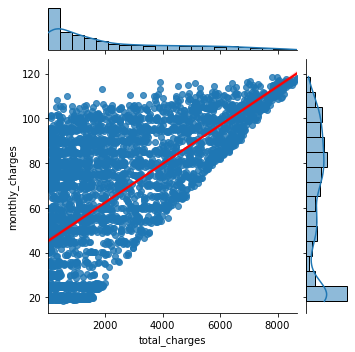

In [16]:
sns.jointplot(x="total_charges", y="monthly_charges", data=train.head(5_000), line_kws={'color': 'red'}, kind='reg', height=5)
plt.show()

### 7. In a seperate notebook, use the functions you have developed in this exercise with the mall_customers dataset in the Codeup database server. You will need to write a sql query to acquire your data. Make spending_score your target variable.

---
# Exploration - Exercises II

In [ ]:
train, validate, test = w.wrangle_zillow()
train.head()

In [ ]:
train.zip_scaled.value_counts()

In [ ]:
train.shape, validate.shape, test.shape

In [ ]:
# df with scaled data
scaled = train[train.columns[7:]]

# df without scaled data
unscaled = train[train.columns[:7]]

In [ ]:
scaled.corr()

**`Corr()` Takeaways**

- at first glance, zip has no correlation to any column
- bath has a stronger correlation to sqft than bed has to sqft
    - bed and bath have the strongest relationship to sqft
- property tax has a strong correlatiion to property value

## Questions

- Is there a relationship between year built and sqft?
- Does property tax have any correlation with property value?
- 

### Hypothesis Testing

**Hyp. 1**

$H_{0}$: There is no correlation between property value and property tax

$H_{a}$: There is a correlation between property value and property tax

$\alpha$ = 0.05

In [ ]:
a = 0.05

In [ ]:
sns.heatmap(train[train.columns[7:]].corr(), annot=True, cmap="Blues")

In [ ]:
corr, p = pearsonr(train.prop_value_scaled, train.prop_tax_scaled)
corr, p

In [ ]:
if p < a:
    print('We reject the null hypothesis')
    print('There is a correlation between property value and property tax')

In [ ]:
plt.scatter(data=train.sample(10_000), x='prop_value', y='prop_tax')

**Hyp. 2**

$H_{0}$: There is no correlation between property value and property tax

$H_{a}$: There is a correlation between property value and property tax

$\alpha$ = 0.05

2. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

3. Write a function named months_to_years that accepts your telco churn dataframe and returns a dataframe with a new feature tenure_years, in complete years as a customer.

4. Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

5. Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.

6. Explore your dataset with any other visualizations you think will be helpful.

7. In a seperate notebook, use the functions you have developed in this exercise with the mall_customers dataset in the Codeup database server. You will need to write a sql query to acquire your data. Make spending_score your target variable.